#  Advancing Wind Energy Forecasting Through Intelligent Predictive Technologies


## Objectives

### 1) Create a robust data analysis framework to process historical and real-time wind data, identifying relevant patterns and correlations.
### 2) Build a machine learning model capable of predicting wind energy patterns with improved accuracy compared to traditional forecasting methods
### 3) Enhance the forecasting model's reliability by integrating real-time data from Internet of Things (IoT) sensors and weather stations.
### 4) Assess the accuracy and reliability of the developed wind energy forecasting model through comprehensive evaluation and validation processes.


#### In this project, we are applying machine learning techniques to predict short-term wind energy production based on historical weather data from the Gujarat and Karnataka regions. Specifically, we are focusing on three algorithms for this task: **Random Forest**, **Long Short-Term Memory (LSTM) networks**, and **Gradient Boosting machines**. These algorithms are chosen for their ability to handle time-series data, capture complex patterns, and provide accurate forecasts in the context of wind energy prediction.

### Algorithms used-
1. Random Forest Regressor
2. Long Short-Term Memory [LSTM] Networks
3. Gradient Boosting Machines [GBM]


### Locations used- Kutch region of Gujarat & a Windmill Estate in Karnatake [150km from Udupi]

## Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Uploading the CSV files together

In [2]:
data_guj = pd.read_csv(r'C:\Users\tsank\Downloads\guj-wind-dataset.csv')

data_kar = pd.read_csv(r'C:\Users\tsank\Downloads\krntk-wind-dataset.csv')


In [3]:
data_guj #Data file of gujarat, few top rows and few bottom rows

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,RH2M,T2M
0,2021,1,1,100.96,3.70,4.48,3.00,1.48,153.12,5.88,7.59,3.23,4.37,138.38,43.94,13.32
1,2021,1,2,100.95,4.05,5.83,3.25,2.58,279.31,6.47,7.45,3.88,3.58,264.50,45.31,13.48
2,2021,1,3,100.88,3.80,4.98,2.94,2.05,108.50,5.96,7.20,3.62,3.58,93.62,48.38,13.44
3,2021,1,4,100.82,3.38,4.09,2.43,1.66,177.69,5.24,6.91,3.40,3.50,178.06,56.12,14.05
4,2021,1,5,100.98,4.02,5.88,3.17,2.71,194.06,6.29,7.11,4.78,2.34,194.06,65.19,15.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,101.17,3.45,6.27,1.04,5.23,167.69,5.13,8.75,1.05,7.70,167.69,39.06,20.89
1123,2024,1,29,101.17,2.68,4.20,1.72,2.48,301.56,4.20,6.41,1.94,4.48,301.62,69.06,22.83
1124,2024,1,30,101.05,3.16,4.79,1.34,3.45,289.25,4.66,7.07,1.45,5.63,289.56,68.00,23.66
1125,2024,1,31,100.94,4.09,6.64,2.49,4.15,261.44,6.02,7.65,4.66,2.98,261.56,74.69,22.82


In [25]:
data_kar #Data file of karnataka, just a few top rows(head)

,YEAR,MO,DY,T2M,RH2M,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
0,2021,1,1,19.34,80.56,93.81,4.21,6.21,2.74,3.47,96.19,6.52,7.48,5.44,2.04,96.19
1,2021,1,2,19.66,81.06,93.79,4.02,5.99,2.45,3.55,100.44,6.27,7.48,4.66,2.84,101.00
2,2021,1,3,22.01,81.50,93.65,3.35,5.52,1.77,3.76,113.94,5.24,6.66,3.47,3.20,114.12
3,2021,1,4,22.39,81.31,93.64,3.19,5.14,1.73,3.41,113.38,4.88,6.52,2.96,3.56,113.62
4,2021,1,5,21.54,84.25,93.71,2.41,4.49,0.68,3.81,98.25,3.89,5.53,0.91,4.62,98.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,21.49,70.31,94.12,3.64,5.75,1.93,3.82,98.69,5.80,7.52,3.16,4.36,98.44
1123,2024,1,29,21.32,70.19,94.04,3.25,5.02,1.89,3.12,93.12,5.43,7.69,2.81,4.88,93.19
1124,2024,1,30,21.77,65.38,93.98,2.52,4.63,1.00,3.63,168.31,3.98,7.36,1.01,6.35,167.75
1125,2024,1,31,21.95,68.38,93.98,1.95,3.48,0.44,3.05,217.44,2.88,5.56,0.59,4.98,216.81


## Feature Engineering

### For improving the model's performance in a wind energy prediction project, considering the nature of wind data and its influence on energy production, here are several new features that could be engineered and potentially enhance the model:

#### LAGGED_WS10M: The wind speed at 10 meters from the previous record, to capture immediate past wind speed trends.

#### WS10M_ROLLING_3H: The rolling average of wind speed at 10 meters over the past 3 records (assuming hourly data, this represents a 3-hour rolling average; adjust the window size based on your data's actual frequency).

#### T2M_ROLLING_3H: The rolling average of temperature at 2 meters over the past 3 records, following the same assumption as above for hourly data.
##### (what is a rolling average/mean? === A rolling mean (or moving average) is a statistical technique used to analyze time-series data by calculating averages of different subsets of the complete dataset. For a given series, it smooths out short-term fluctuations and highlights longer-term trends or cycles. The rolling mean is calculated by taking the average of any subset of numbers, and as you move forward in the data set, you shift the subset window.)
#### WD10M_SIN and WD10M_COS: Sine and cosine transformations of the wind direction at 10 meters to capture the cyclic nature of wind direction.

In [26]:

# Assuming the data is sorted chronologically.

# Adding MONTH directly from the 'MO' column
data_guj['MONTH'] = data_guj['MO']
data_kar['MONTH'] = data_kar['MO']

# Adding LAGGED_WS10M for wind speed
data_guj['LAGGED_WS10M'] = data_guj['WS10M'].shift(1)
data_kar['LAGGED_WS10M'] = data_kar['WS10M'].shift(1)

# Filling any NaN values in LAGGED_WS10M with the mean of the column
data_guj['LAGGED_WS10M'].fillna(data_guj['LAGGED_WS10M'].mean(), inplace=True)
data_kar['LAGGED_WS10M'].fillna(data_kar['LAGGED_WS10M'].mean(), inplace=True)

# Calculating rolling averages for WS10M and T2M over the past 3 records
data_guj['WS10M_ROLLING_3H'] = data_guj['WS10M'].rolling(window=3, min_periods=1).mean()
data_kar['WS10M_ROLLING_3H'] = data_kar['WS10M'].rolling(window=3, min_periods=1).mean()

data_guj['T2M_ROLLING_3H'] = data_guj['T2M'].rolling(window=3, min_periods=1).mean()
data_kar['T2M_ROLLING_3H'] = data_kar['T2M'].rolling(window=3, min_periods=1).mean()

# Applying sine and cosine transformations to wind direction
data_guj['WD10M_SIN'] = np.sin(np.radians(data_guj['WD10M']))
data_kar['WD10M_SIN'] = np.sin(np.radians(data_kar['WD10M']))

data_guj['WD10M_COS'] = np.cos(np.radians(data_guj['WD10M']))
data_kar['WD10M_COS'] = np.cos(np.radians(data_kar['WD10M']))




In [27]:
# Assuming the data is sorted chronologically.

# Adding MONTH directly from the 'MO' column
data_guj['MONTH'] = data_guj['MO']
data_kar['MONTH'] = data_kar['MO']

# Adding LAGGED_WS10M for wind speed
data_guj['LAGGED_WS50M'] = data_guj['WS50M'].shift(1)
data_kar['LAGGED_WS50M'] = data_kar['WS50M'].shift(1)

# Filling any NaN values in LAGGED_WS10M with the mean of the column
data_guj['LAGGED_WS50M'].fillna(data_guj['LAGGED_WS50M'].mean(), inplace=True)
data_kar['LAGGED_WS50M'].fillna(data_kar['LAGGED_WS50M'].mean(), inplace=True)

# Calculating rolling averages for WS10M and T2M over the past 3 records
data_guj['WS50M_ROLLING_3H'] = data_guj['WS50M'].rolling(window=3, min_periods=1).mean()
data_kar['WS50M_ROLLING_3H'] = data_kar['WS50M'].rolling(window=3, min_periods=1).mean()

data_guj['T2M_ROLLING_3H'] = data_guj['T2M'].rolling(window=3, min_periods=1).mean()
data_kar['T2M_ROLLING_3H'] = data_kar['T2M'].rolling(window=3, min_periods=1).mean()

# Applying sine and cosine transformations to wind direction
data_guj['WD50M_SIN'] = np.sin(np.radians(data_guj['WD50M']))
data_kar['WD50M_SIN'] = np.sin(np.radians(data_kar['WD50M']))

data_guj['WD50M_COS'] = np.cos(np.radians(data_guj['WD50M']))
data_kar['WD50M_COS'] = np.cos(np.radians(data_kar['WD50M']))



In [28]:
data_guj.head() #file with new features

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,MONTH,LAGGED_WS10M,WS10M_ROLLING_3H,T2M_ROLLING_3H,WD10M_SIN,WD10M_COS,LAGGED_WS50M,WS50M_ROLLING_3H,WD50M_SIN,WD50M_COS
0,2021,1,1,100.96,3.70,4.48,3.00,1.48,153.12,5.88,...,1,4.528064,3.700000,13.320000,0.452123,-0.891955,6.168641,5.880000,0.664187,-0.747566
1,2021,1,2,100.95,4.05,5.83,3.25,2.58,279.31,6.47,...,1,3.700000,3.875000,13.400000,-0.986827,0.161776,5.880000,6.175000,-0.995396,-0.095846
2,2021,1,3,100.88,3.80,4.98,2.94,2.05,108.50,5.96,...,1,4.050000,3.850000,13.413333,0.948324,-0.317305,6.470000,6.103333,0.998005,-0.063139
3,2021,1,4,100.82,3.38,4.09,2.43,1.66,177.69,5.24,...,1,3.800000,3.743333,13.656667,0.040306,-0.999187,5.960000,5.890000,0.033853,-0.999427
4,2021,1,5,100.98,4.02,5.88,3.17,2.71,194.06,6.29,...,1,3.380000,3.733333,14.213333,-0.242938,-0.970042,5.240000,5.830000,-0.242938,-0.970042


In [29]:
data_kar.head() #file with new features

,YEAR,MO,DY,T2M,RH2M,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,...,MONTH,LAGGED_WS10M,WS10M_ROLLING_3H,T2M_ROLLING_3H,WD10M_SIN,WD10M_COS,LAGGED_WS50M,WS50M_ROLLING_3H,WD50M_SIN,WD50M_COS
0,2021,1,1,19.34,80.56,93.81,4.21,6.21,2.74,3.47,...,1,3.518845,4.210000,19.340000,0.994170,-0.107826,5.125115,6.520000,0.994170,-0.107826
1,2021,1,2,19.66,81.06,93.79,4.02,5.99,2.45,3.55,...,1,4.210000,4.115000,19.500000,0.983445,-0.181206,6.520000,6.395000,0.981627,-0.190809
2,2021,1,3,22.01,81.50,93.65,3.35,5.52,1.77,3.76,...,1,4.020000,3.860000,20.336667,0.913971,-0.405780,6.270000,6.010000,0.912692,-0.408649
3,2021,1,4,22.39,81.31,93.64,3.19,5.14,1.73,3.41,...,1,3.350000,3.520000,21.353333,0.917893,-0.396828,5.240000,5.463333,0.916223,-0.400669
4,2021,1,5,21.54,84.25,93.71,2.41,4.49,0.68,3.81,...,1,3.190000,2.983333,21.980000,0.989651,-0.143493,4.880000,4.670000,0.988014,-0.154366


### Wind Speed Distribution at 10 meters

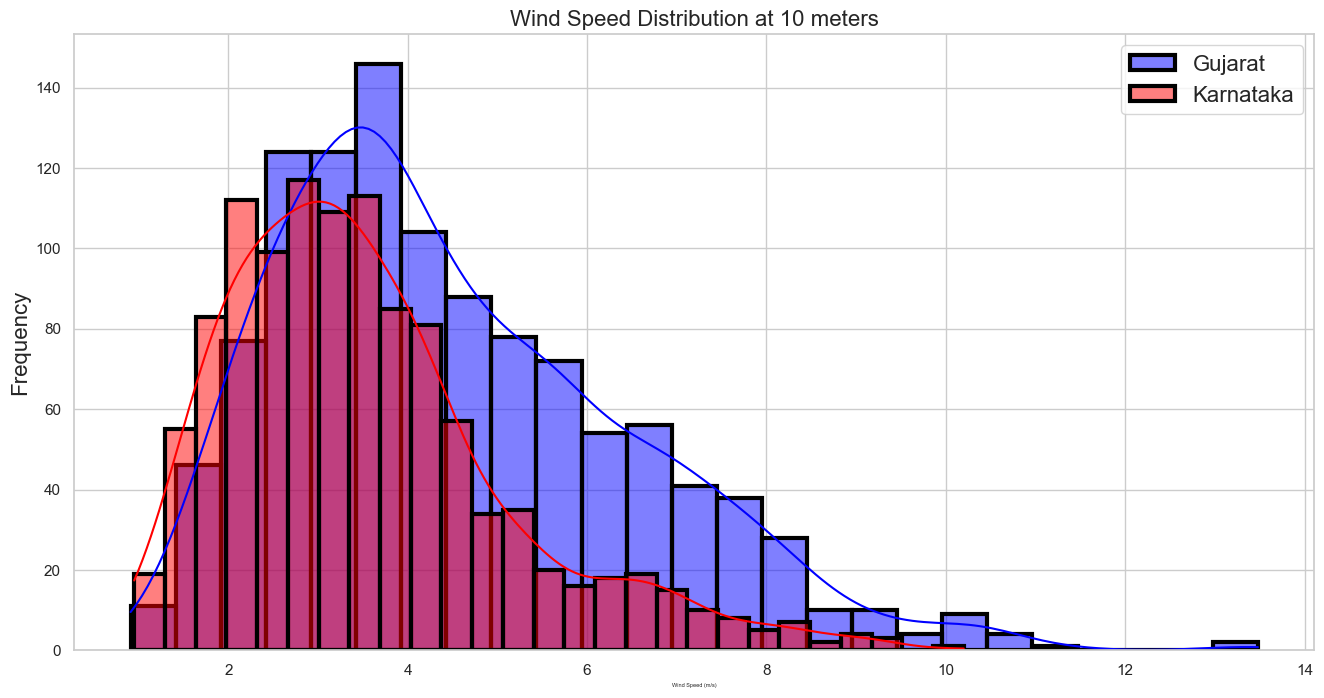

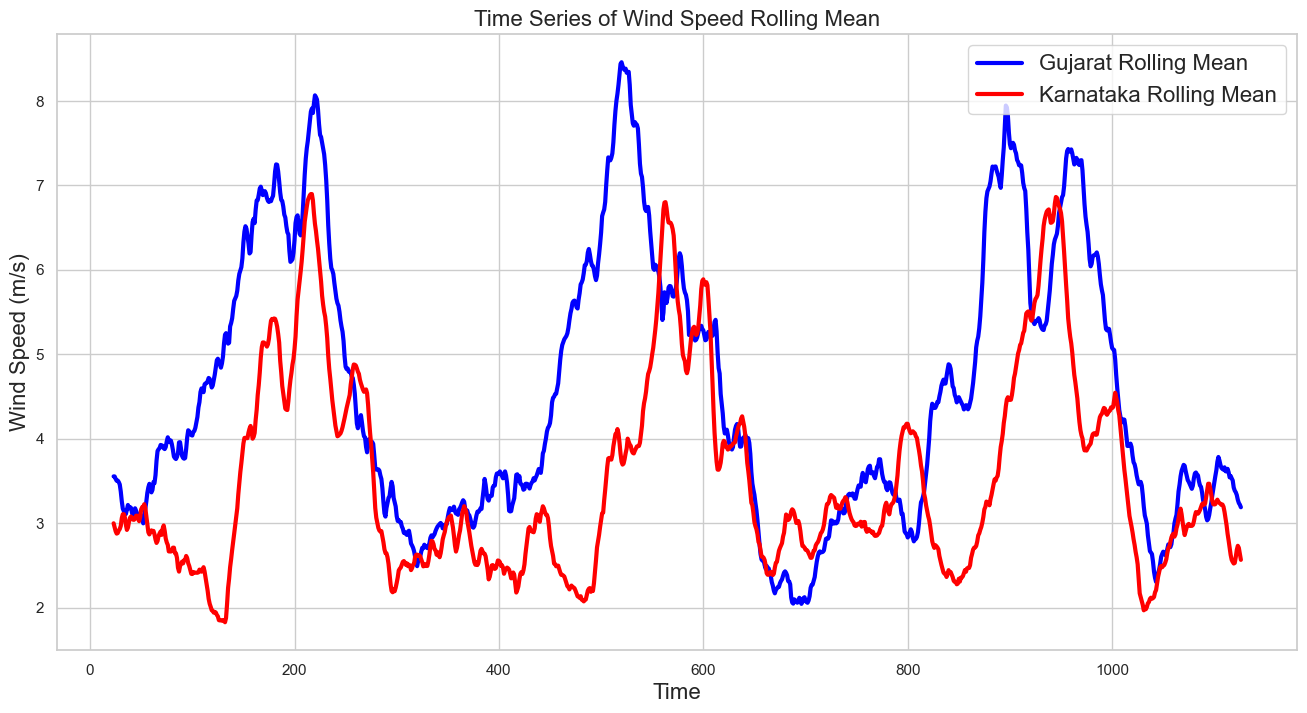

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # Adds a grid 
plt.rcParams.update({'font.size': 16})

# Wind Speed Distribution
plt.figure(figsize=(16, 8))
sns.histplot(data_guj['WS10M'], kde=True, color='blue', label='Gujarat', edgecolor='black', linewidth=3)
sns.histplot(data_kar['WS10M'], kde=True, color='red', label='Karnataka', edgecolor='black', linewidth=3)
plt.title('Wind Speed Distribution at 10 meters', fontsize=16)
plt.legend(prop={'size': 16})
plt.xlabel('Wind Speed (m/s)', fontsize=4) # Label for x-axis
plt.ylabel('Frequency', fontsize=16) # Label for y-axis
plt.show()

# Time Series of Wind Speed-involves the collection and analysis of wind-related data over time
plt.figure(figsize=(16, 8))
plt.plot(data_guj['WS10M'].rolling(window=24).mean(), label='Gujarat Rolling Mean', color='blue', linewidth=3)
plt.plot(data_kar['WS10M'].rolling(window=24).mean(), color='red', label='Karnataka Rolling Mean', linewidth=3)
plt.title('Time Series of Wind Speed Rolling Mean', fontsize=16)
plt.legend(prop={'size': 16})
plt.xlabel('Time', fontsize=16) # Label for x-axis
plt.ylabel('Wind Speed (m/s)', fontsize=16) # Label for y-axis
plt.show()


### Wind Speed Distribution at 50 meters

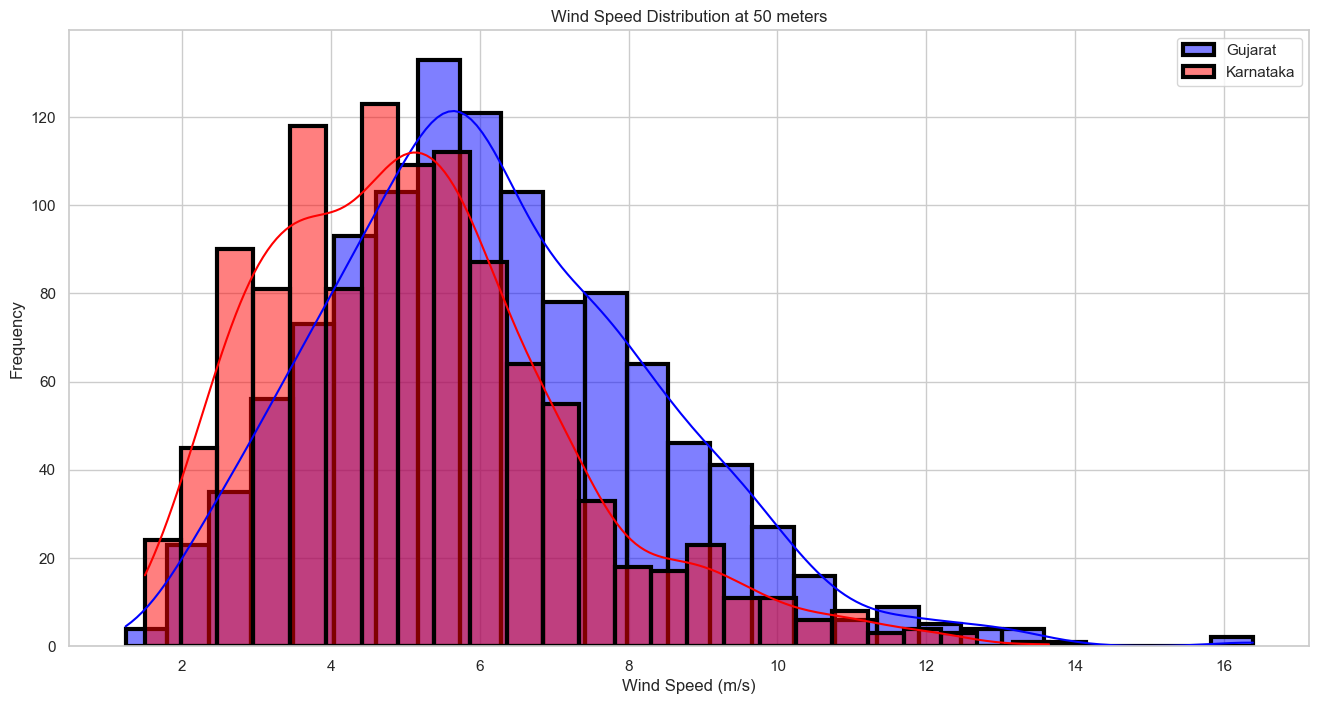

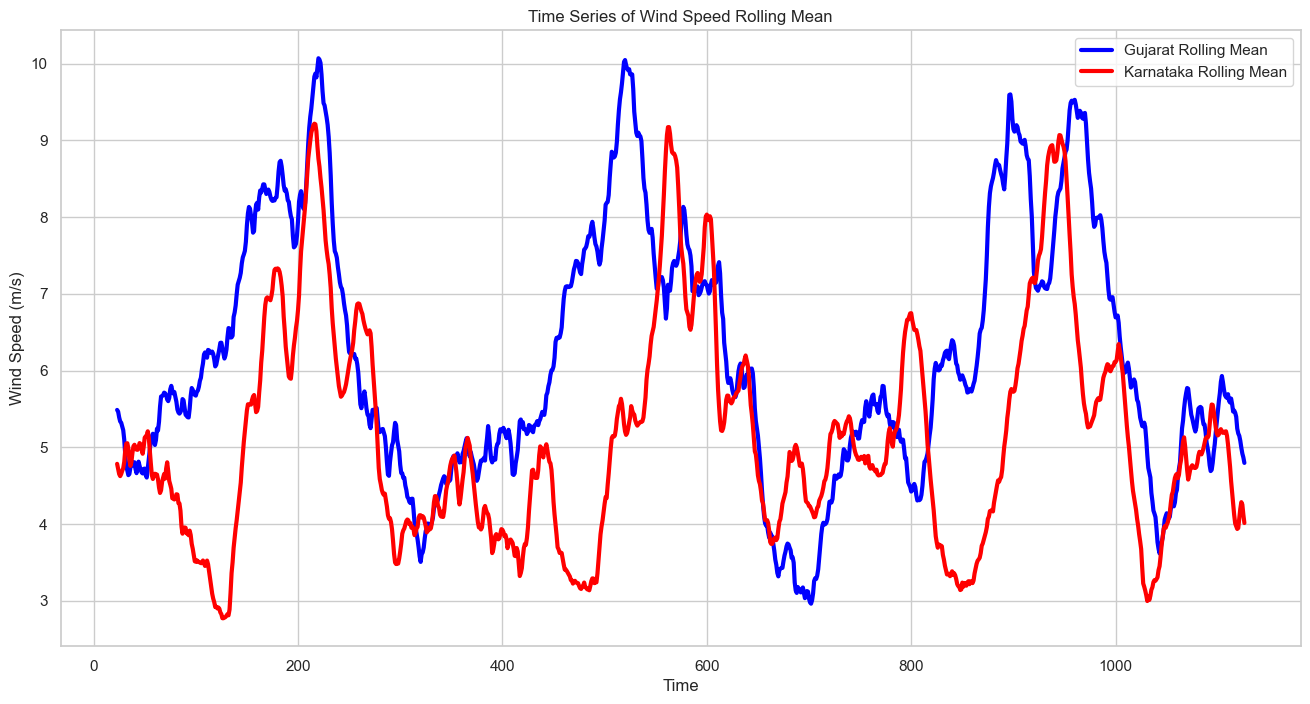

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid") 
plt.rcParams.update({'font.size': 16}) 

# Wind Speed Distribution at 50 meters
plt.figure(figsize=(16, 8))
sns.histplot(data_guj['WS50M'], kde=True, color='blue', label='Gujarat', edgecolor='black', linewidth=3)
sns.histplot(data_kar['WS50M'], kde=True, color='red', label='Karnataka', edgecolor='black', linewidth=3)
plt.title('Wind Speed Distribution at 50 meters') 
plt.legend() 
plt.xlabel('Wind Speed (m/s)') 
plt.ylabel('Frequency') 
plt.show()

# Time Series of Wind Speed Rolling Mean
plt.figure(figsize=(16, 8))
plt.plot(data_guj['WS50M'].rolling(window=24).mean(), label='Gujarat Rolling Mean', color='blue', linewidth=3)
plt.plot(data_kar['WS50M'].rolling(window=24).mean(), color='red', label='Karnataka Rolling Mean', linewidth=3)
plt.title('Time Series of Wind Speed Rolling Mean') 
plt.legend() 
plt.xlabel('Time') 
plt.ylabel('Wind Speed (m/s)') 
plt.show()


## Correlation Matrix


#### A correlation matrix is a tool used in data visualization to summarize the correlations between multiple variables in a dataset. It is typically represented as a table or a heatmap, where each cell in the matrix shows the correlation coefficient between two variables. The values of the correlation coefficients range from -1 to 1, where:

### 1 indicates a __perfect positive correlation__: as one variable increases, the other variable also increases.
### -1 indicates a **perfect negative correlation**: as one variable increases, the other variable decreases.
### 0 indicates **no linear correlation** between the variables.

## Correlation Matrix for Gujarat and Karnataka Wind speed at 10M

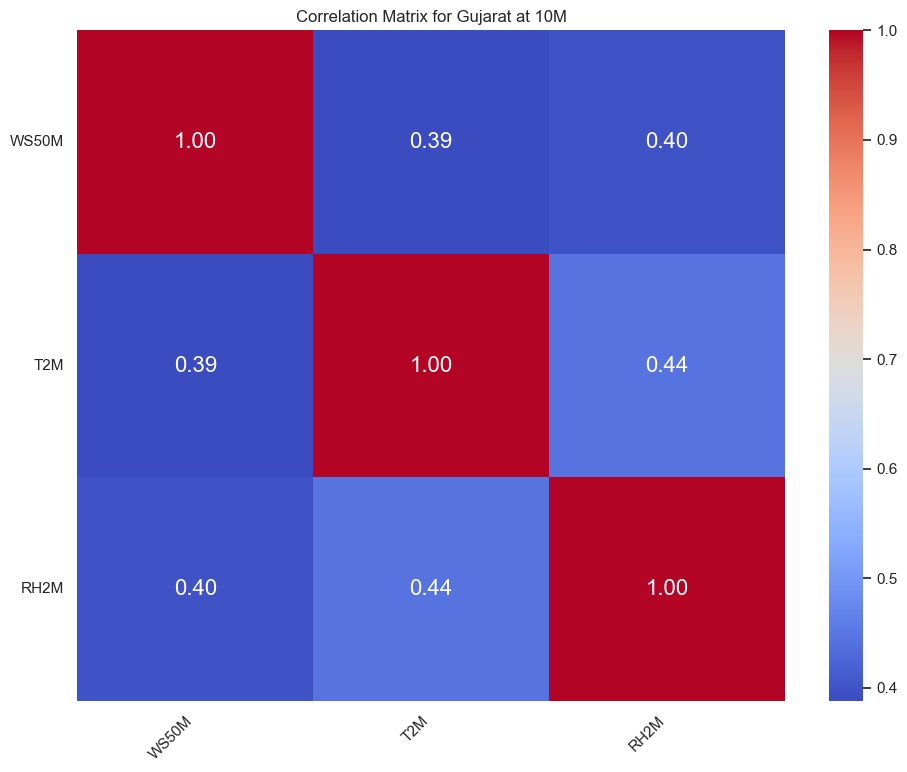

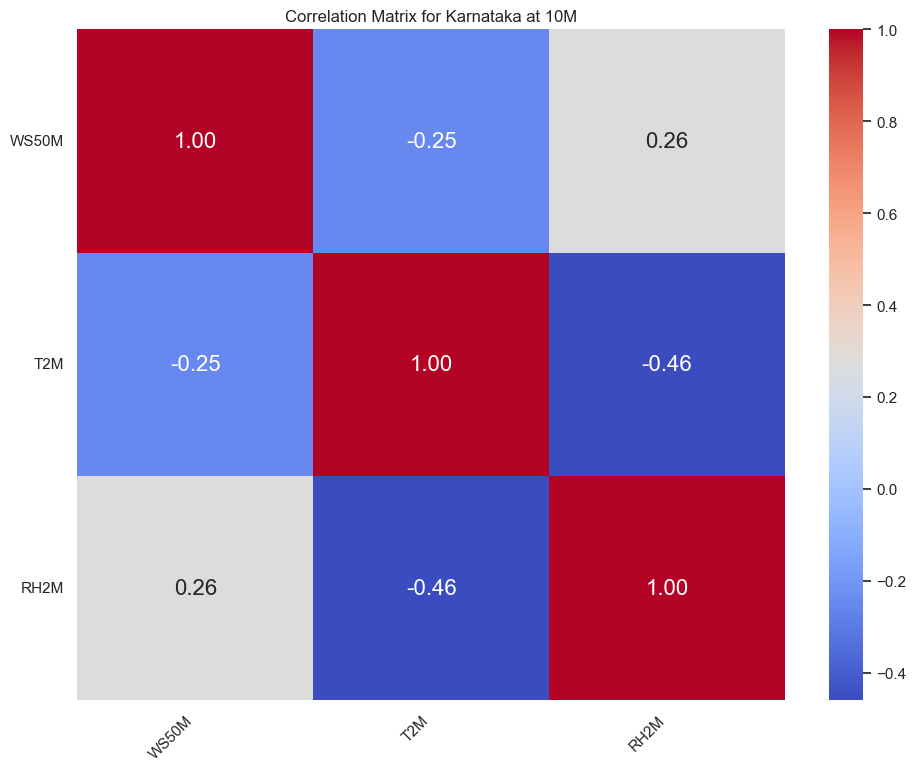

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="white")  
plt.rcParams.update({'font.size': 16})  

# Plotting the correlation matrix for Gujarat at 10 M
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_guj, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16})
plt.title('Correlation Matrix for Gujarat at 10M')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

# Plotting the correlation matrix for Karnataka at 10 M
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_kar, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16})
plt.title('Correlation Matrix for Karnataka at 10M')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Correlation Matrix for Gujarat and Karnataka Wind speed at 50M

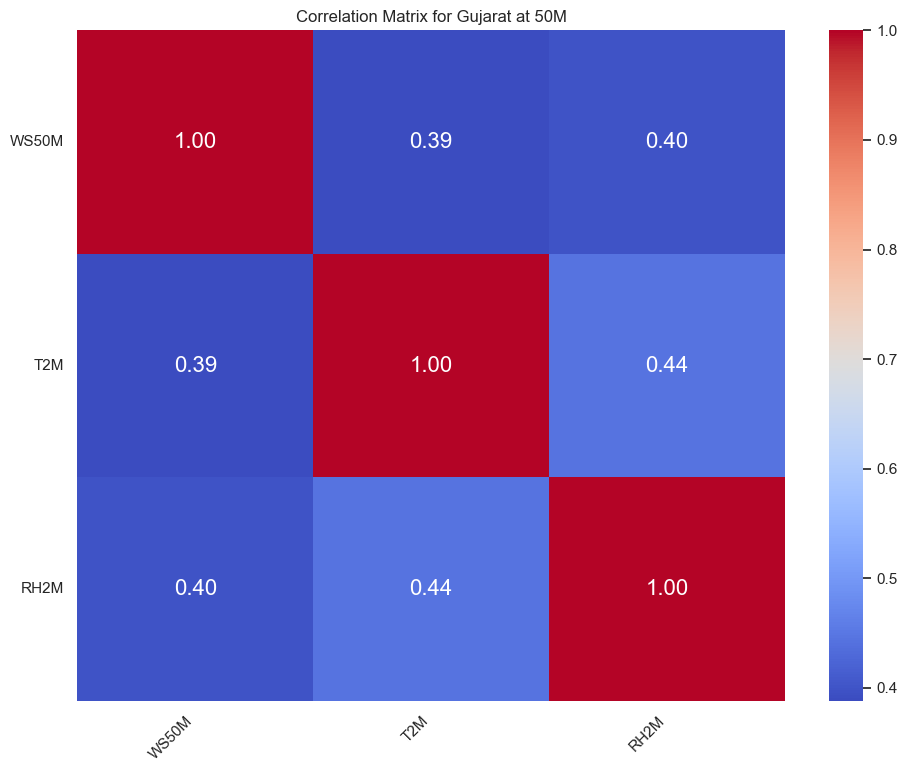

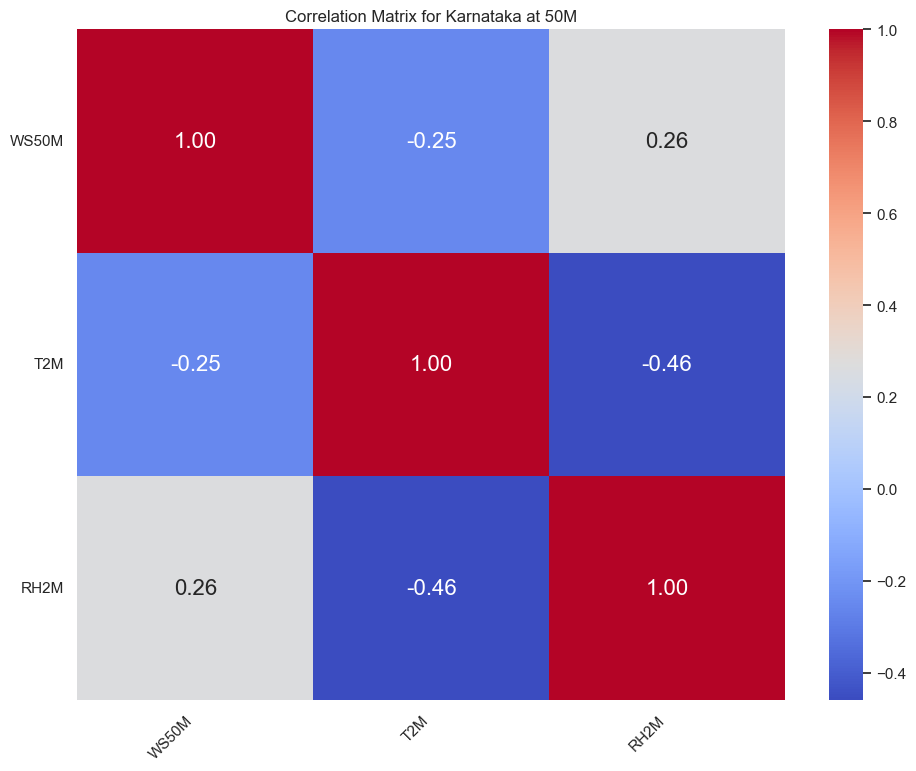

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="white") 
plt.rcParams.update({'font.size': 16}) 

# Plotting the correlation matrix for Gujarat at 50 M
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_guj, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16})
plt.title('Correlation Matrix for Gujarat at 50M')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

# Plotting the correlation matrix for Karnataka at 50 M
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_kar, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16})
plt.title('Correlation Matrix for Karnataka at 50M')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## BOX AND WHISKER PLOTS

#### A box plot (or box-and-whisker plot) is a graphical representation used in data visualization to display the distribution of a dataset based on a five-number summary: minimum, first quartile (Q1), median (second quartile, Q2), third quartile (Q3), and maximum. It provides a visual summary of the central tendency, dispersion, and skewness of the data and highlights outliers.

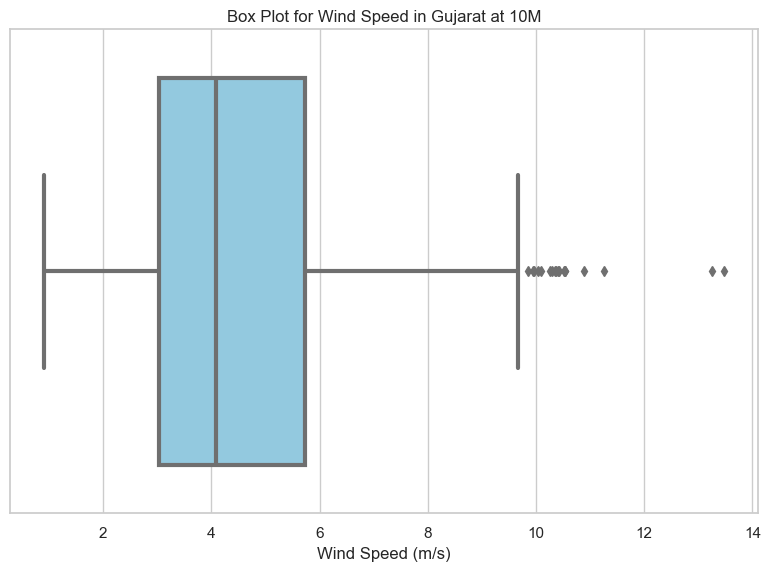

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  
plt.rcParams.update({'font.size': 16})  

# Creating the box plot for wind speed in Gujarat at 10M
sns.boxplot(x=data_guj['WS10M'], color="skyblue", linewidth=3)  


plt.title('Box Plot for Wind Speed in Gujarat at 10M')
plt.xlabel('Wind Speed (m/s)')  

plt.tight_layout()  
plt.show()


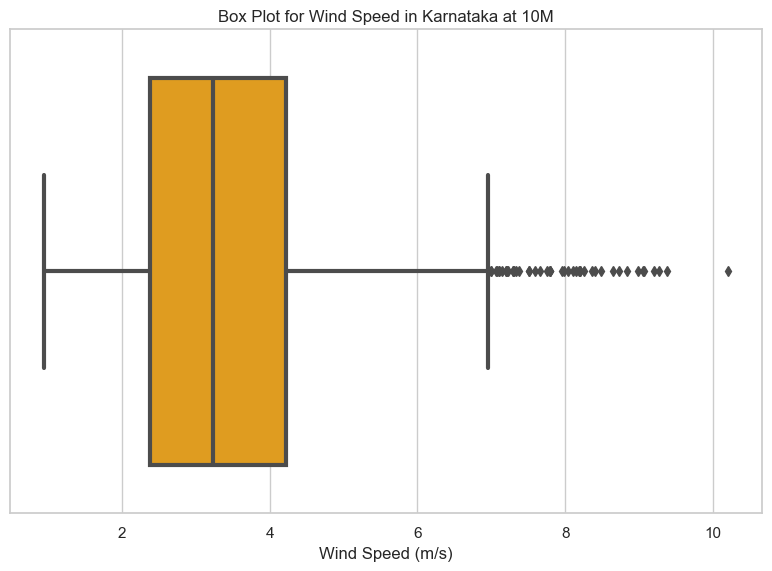

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  
plt.rcParams.update({'font.size': 16})  

# Creating the box plot for wind speed in Karnataka at 10M
sns.boxplot(x=data_kar['WS10M'], color="orange", linewidth=3)  

# Adding titles and labels
plt.title('Box Plot for Wind Speed in Karnataka at 10M')
plt.xlabel('Wind Speed (m/s)') 

plt.tight_layout()  
plt.show()


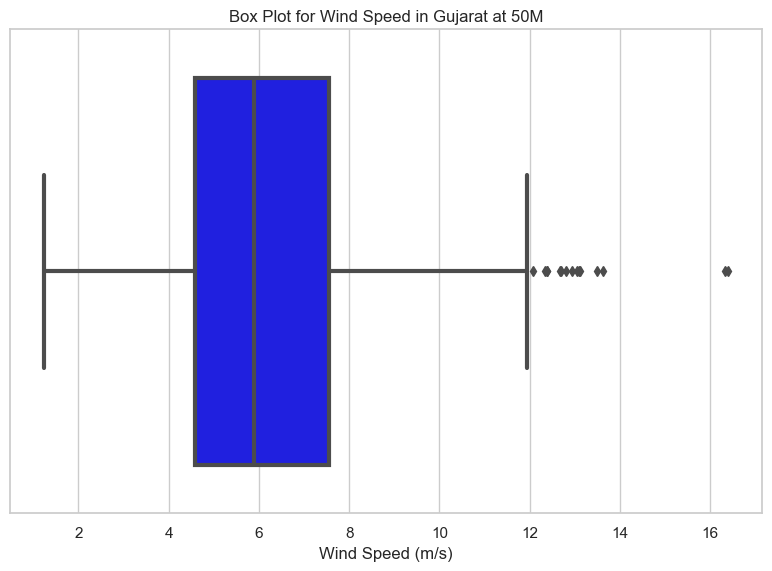

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))  
plt.rcParams.update({'font.size': 16})  

# Creating the box plot for wind speed in Gujarat at 50 M 
sns.boxplot(x=data_guj['WS50M'], color="blue", linewidth=3) 


plt.title('Box Plot for Wind Speed in Gujarat at 50M')
plt.xlabel('Wind Speed (m/s)') 

plt.tight_layout()  
plt.show()


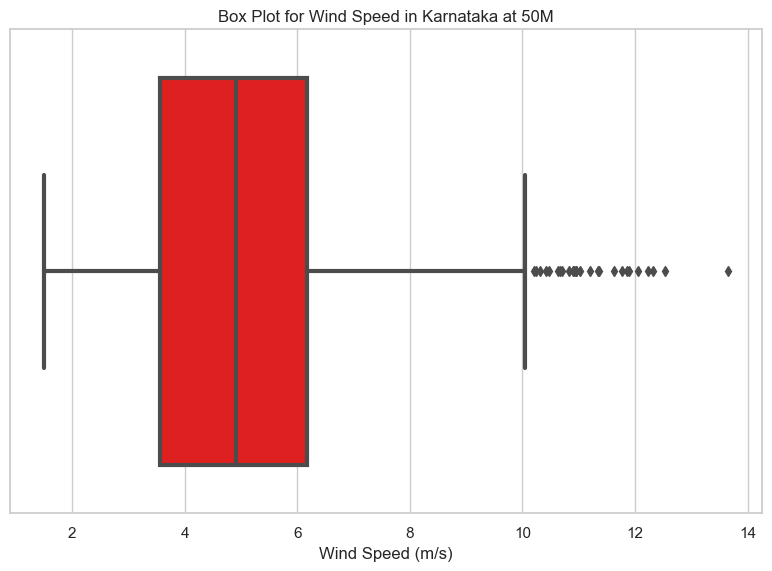

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting overall aesthetics
sns.set(style="whitegrid")  # Provides a subtle background grid for better readability
plt.figure(figsize=(8, 6))  # Adjusts the figure size for better detail visibility
plt.rcParams.update({'font.size': 16})  # Setting the font size for all plot texts

# Creating the box plot for wind speed in Karnataka at 50M with specified styles
sns.boxplot(x=data_kar['WS50M'], color="red", linewidth=3)  # Specifying color and line width

# Adding titles and labels
plt.title('Box Plot for Wind Speed in Karnataka at 50M')
plt.xlabel('Wind Speed (m/s)')  # Optionally, add an x-axis label for clarity

plt.tight_layout()  # Adjusting the layout to ensure everything fits without overlap
plt.show()


## all 4 plots in a single code

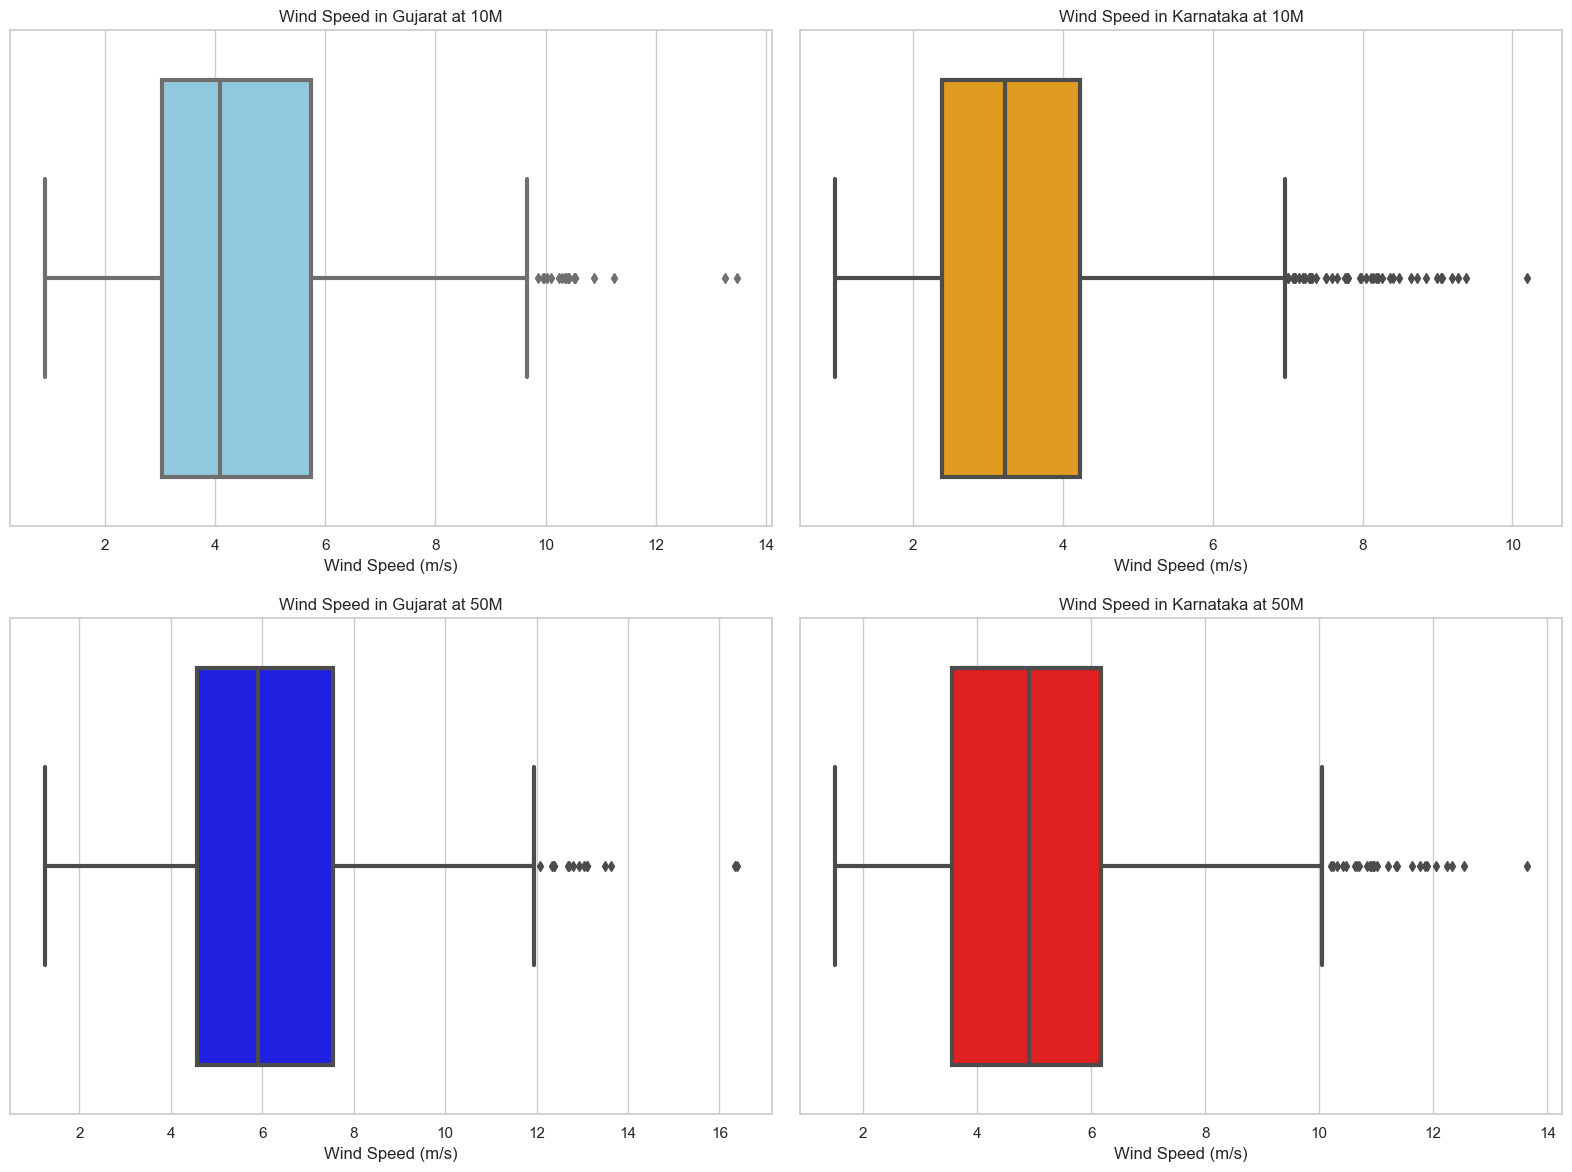

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the overall aesthetics once
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 16})

# Creating a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Adjusted the overall figure size for better visibility

# Box plot for wind speed in Gujarat at 10M
sns.boxplot(x=data_guj['WS10M'], color="skyblue", linewidth=3, ax=axes[0, 0])
axes[0, 0].set_title('Wind Speed in Gujarat at 10M')
axes[0, 0].set_xlabel('Wind Speed (m/s)')

# Box plot for wind speed in Karnataka at 10M
sns.boxplot(x=data_kar['WS10M'], color="orange", linewidth=3, ax=axes[0, 1])
axes[0, 1].set_title('Wind Speed in Karnataka at 10M')
axes[0, 1].set_xlabel('Wind Speed (m/s)')

# Box plot for wind speed in Gujarat at 50M
sns.boxplot(x=data_guj['WS50M'], color="blue", linewidth=3, ax=axes[1, 0])
axes[1, 0].set_title('Wind Speed in Gujarat at 50M')
axes[1, 0].set_xlabel('Wind Speed (m/s)')

# Box plot for wind speed in Karnataka at 50M
sns.boxplot(x=data_kar['WS50M'], color="red", linewidth=3, ax=axes[1, 1])
axes[1, 1].set_title('Wind Speed in Karnataka at 50M')
axes[1, 1].set_xlabel('Wind Speed (m/s)')

plt.tight_layout()  # Adjusting the layout to ensure everything fits without overlap
plt.show()


In [18]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


#### This plot below categorizes wind directions into eight main compass points (N, NE, E, SE, S, SW, W, NW) for the wind dataset. It then calculates the average wind speed for each direction and visualizes these averages with a bar plot.
#### The plot shows how wind speed varies with direction, identifying which directions typically have higher or lower wind speeds.

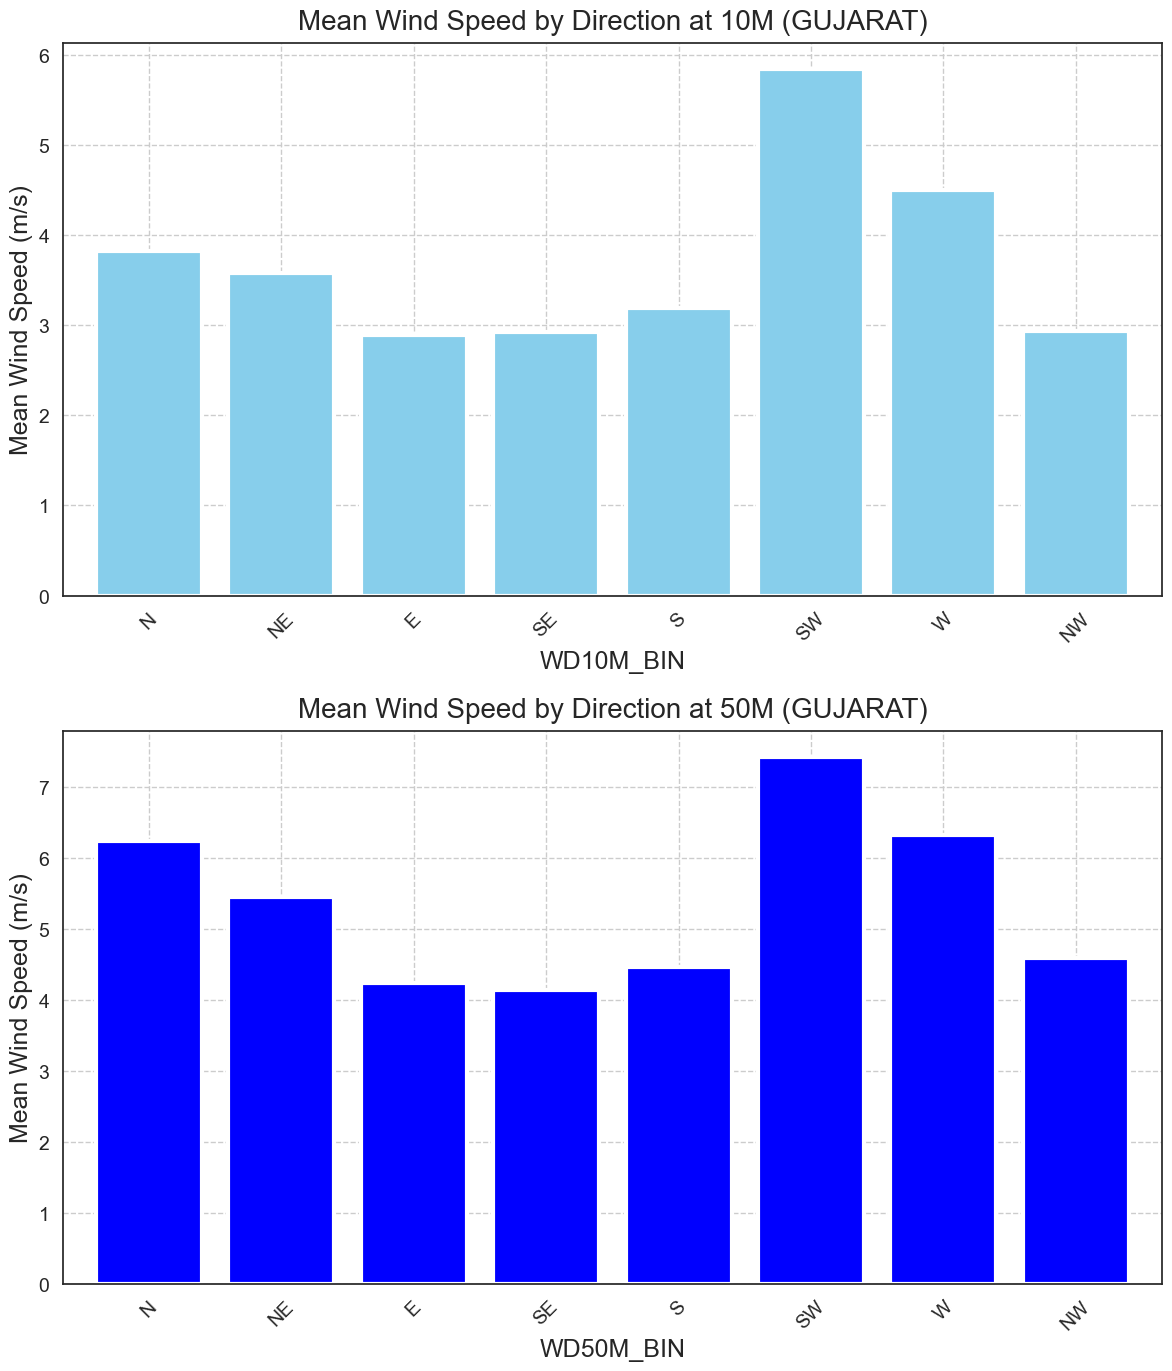

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.titlepad': 10,
    'legend.fontsize': 16,
    'figure.figsize': (12, 14)  
})

# Bin wind directions into categories for both 10M and 50M
direction_bins = np.arange(-22.5, 360, 45)
direction_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
data_guj['WD10M_BIN'] = pd.cut(data_guj['WD10M'], bins=direction_bins, labels=direction_labels, right=False)
data_guj['WD50M_BIN'] = pd.cut(data_guj['WD50M'], bins=direction_bins, labels=direction_labels, right=False)

# Group by the binned direction and calculate the mean speed for each bin for 10M and 50M
wind_speed_by_dir_10m = data_guj.groupby('WD10M_BIN')['WS10M'].mean().reindex(direction_labels)
wind_speed_by_dir_50m = data_guj.groupby('WD50M_BIN')['WS50M'].mean().reindex(direction_labels)

# Create a 2x1 subplot layout
fig, ax = plt.subplots(2, 1, figsize=(12, 14), tight_layout=True)

# Plot for 10M
wind_speed_by_dir_10m.plot(kind='bar', color='skyblue', ax=ax[0], width=0.8, linewidth=3)
ax[0].set_ylabel('Mean Wind Speed (m/s)', fontsize=18)
ax[0].set_title('Mean Wind Speed by Direction at 10M (GUJARAT)', fontsize=20)
ax[0].set_xticklabels(labels=direction_labels, rotation=45)
ax[0].grid(True, which='both', linestyle='--', linewidth=1)

# Plot for 50M
wind_speed_by_dir_50m.plot(kind='bar', color='blue', ax=ax[1], width=0.8, linewidth=3)
ax[1].set_ylabel('Mean Wind Speed (m/s)', fontsize=18)
ax[1].set_title('Mean Wind Speed by Direction at 50M (GUJARAT)', fontsize=20)
ax[1].set_xticklabels(labels=direction_labels, rotation=45)
ax[1].grid(True, which='both', linestyle='--', linewidth=1)


plt.show()


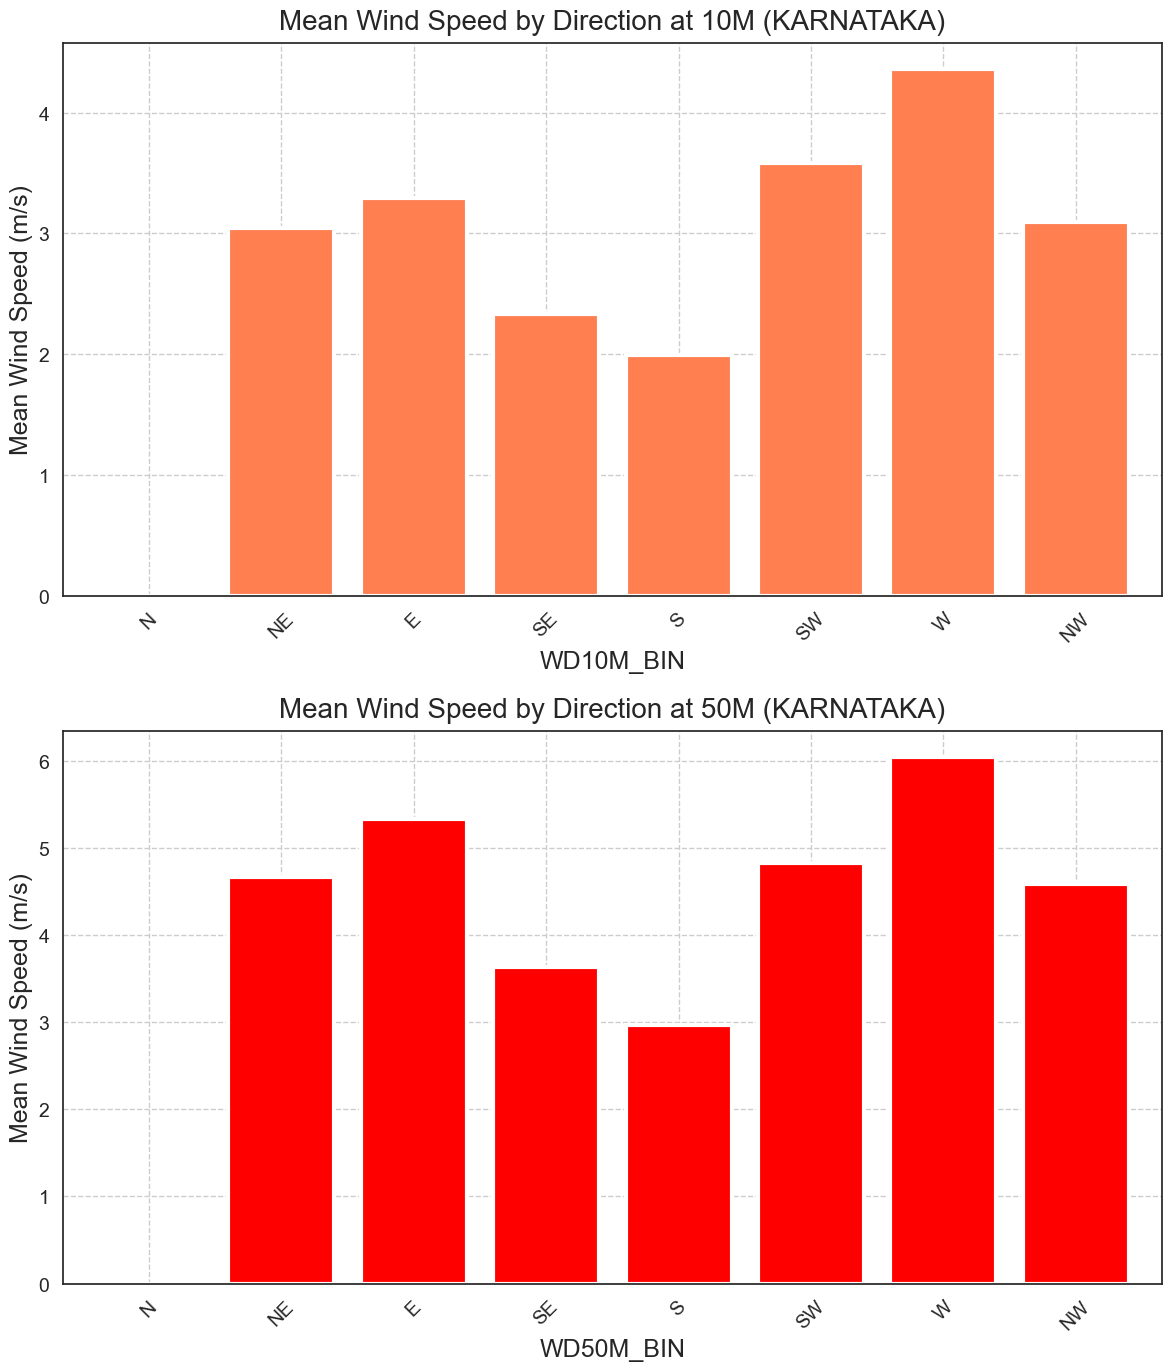

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



plt.rcParams.update({
    'font.size': 16,  
    'axes.labelsize': 18,
    'axes.titlesize': 20,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.titlepad': 10,
    'legend.fontsize': 16,
    'figure.figsize': (12, 14)  
})

# Bin wind directions into categories for both 10M and 50M
direction_bins = np.arange(-22.5, 360, 45)
direction_labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
data_kar['WD10M_BIN'] = pd.cut(data_kar['WD10M'], bins=direction_bins, labels=direction_labels, right=False)
data_kar['WD50M_BIN'] = pd.cut(data_kar['WD50M'], bins=direction_bins, labels=direction_labels, right=False)

# Group by the binned direction and calculate the mean speed for each bin for 10M and 50M
wind_speed_by_dir_10m = data_kar.groupby('WD10M_BIN')['WS10M'].mean().reindex(direction_labels)
wind_speed_by_dir_50m = data_kar.groupby('WD50M_BIN')['WS50M'].mean().reindex(direction_labels)

# Create a 2x1 subplot layout
fig, ax = plt.subplots(2, 1, figsize=(12, 14), tight_layout=True)

# Plot for 10M
wind_speed_by_dir_10m.plot(kind='bar', color='coral', ax=ax[0], width=0.8, linewidth=3)
ax[0].set_ylabel('Mean Wind Speed (m/s)', fontsize=18)
ax[0].set_title('Mean Wind Speed by Direction at 10M (KARNATAKA)', fontsize=20)
ax[0].set_xticklabels(labels=direction_labels, rotation=45)
ax[0].grid(True, which='both', linestyle='--', linewidth=1)

# Plot for 50M
wind_speed_by_dir_50m.plot(kind='bar', color='red', ax=ax[1], width=0.8, linewidth=3)
ax[1].set_ylabel('Mean Wind Speed (m/s)', fontsize=18)
ax[1].set_title('Mean Wind Speed by Direction at 50M (KARNATAKA)', fontsize=20)
ax[1].set_xticklabels(labels=direction_labels, rotation=45)
ax[1].grid(True, which='both', linestyle='--', linewidth=1)


plt.show()


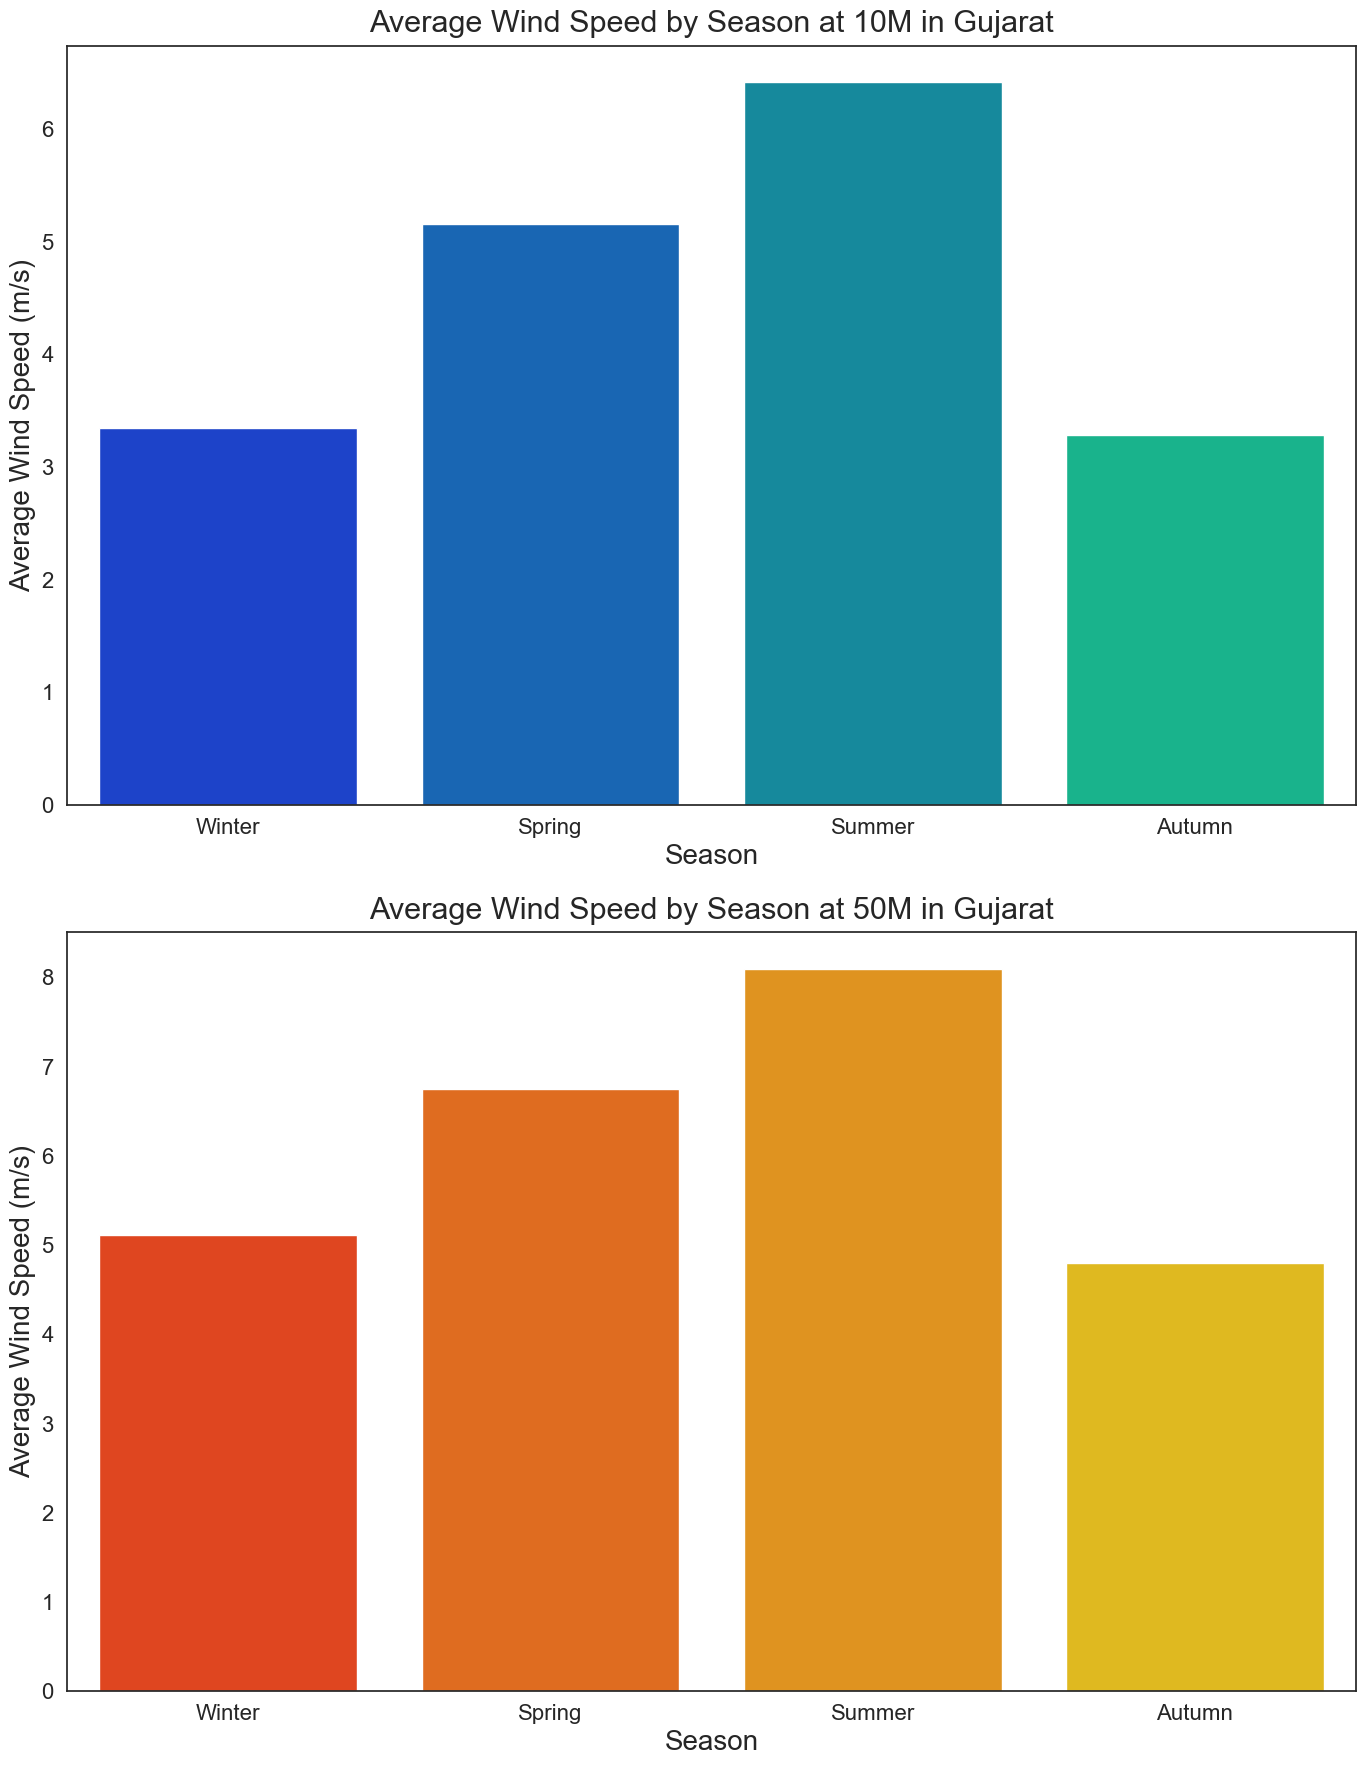

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 20,
    'axes.titlesize': 22,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'figure.figsize': (14, 10)  
})

# Mapping months to seasons
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}
data_guj['Season'] = data_guj['MO'].map(seasons)

# Create a 2x1 subplot layout
fig, ax = plt.subplots(2, 1, figsize=(14, 18), tight_layout=True)

# wind speed by season for 10M and 50M
seasonal_wind_speeds_10m = data_guj.groupby('Season')['WS10M'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
seasonal_wind_speeds_50m = data_guj.groupby('Season')['WS50M'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot for 10M
sns.barplot(x=seasonal_wind_speeds_10m.index, y=seasonal_wind_speeds_10m.values, palette='winter', ax=ax[0])
ax[0].set_title('Average Wind Speed by Season at 10M in Gujarat')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Average Wind Speed (m/s)')

# Plot for 50M
sns.barplot(x=seasonal_wind_speeds_50m.index, y=seasonal_wind_speeds_50m.values, palette='autumn', ax=ax[1])
ax[1].set_title('Average Wind Speed by Season at 50M in Gujarat')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Average Wind Speed (m/s)')


plt.show()


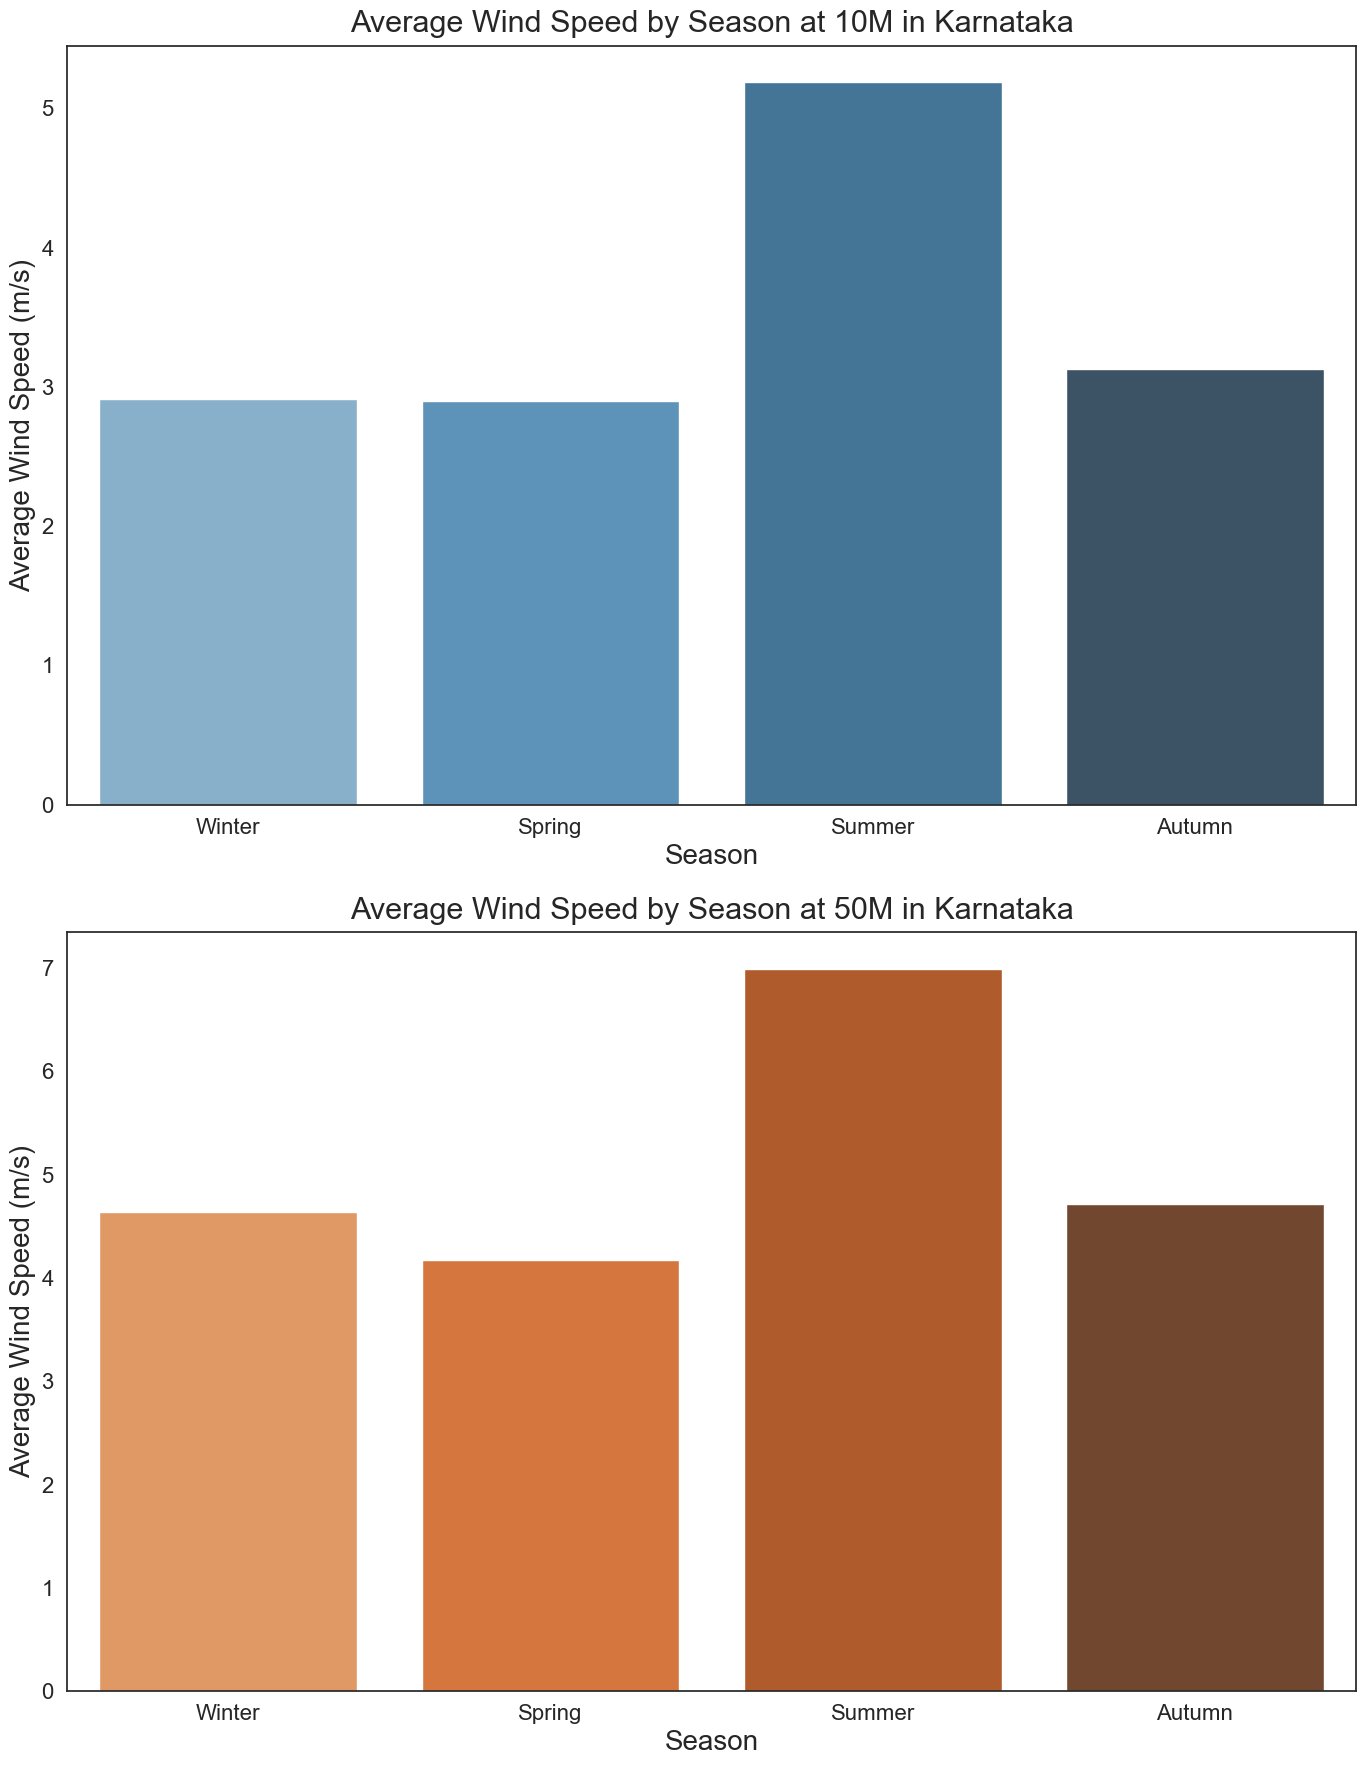

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




plt.rcParams.update({
    'font.size': 18, 
    'axes.labelsize': 20,
    'axes.titlesize': 22,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'figure.figsize': (14, 10)
})

# Mapping months to seasons
seasons = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Autumn',
    10: 'Autumn', 11: 'Autumn', 12: 'Winter'
}
data_kar['Season'] = data_kar['MO'].map(seasons)

fig, ax = plt.subplots(2, 1, figsize=(14, 18), tight_layout=True)

# wind speed by season for 10M and 50M
seasonal_wind_speeds_10m = data_kar.groupby('Season')['WS10M'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])
seasonal_wind_speeds_50m = data_kar.groupby('Season')['WS50M'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot for 10M
sns.barplot(x=seasonal_wind_speeds_10m.index, y=seasonal_wind_speeds_10m.values, palette='Blues_d', ax=ax[0])
ax[0].set_title('Average Wind Speed by Season at 10M in Karnataka')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Average Wind Speed (m/s)')

# Plot for 50M
sns.barplot(x=seasonal_wind_speeds_50m.index, y=seasonal_wind_speeds_50m.values, palette='Oranges_d', ax=ax[1])
ax[1].set_title('Average Wind Speed by Season at 50M in Karnataka')
ax[1].set_xlabel('Season')
ax[1].set_ylabel('Average Wind Speed (m/s)')

plt.show()


## visual comparison of wind speed w.r.t between gujarat and karnataka

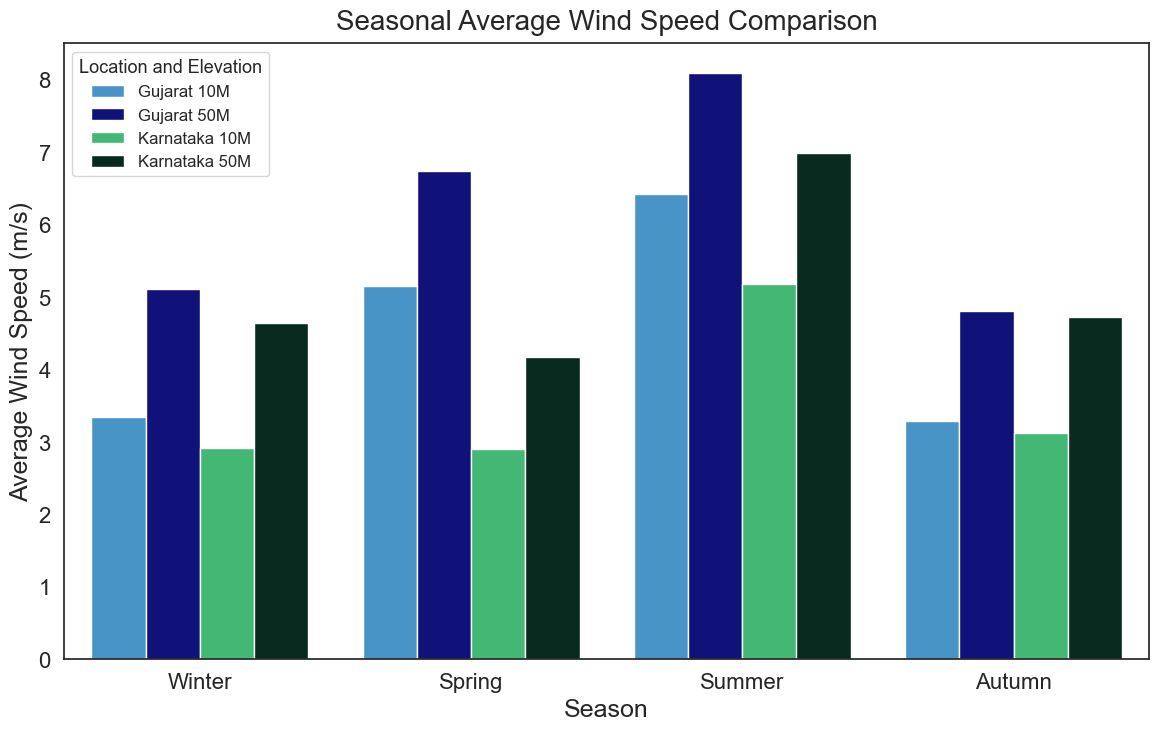

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




colors = ["#3498db", "#00008B", "#2ecc71", "#023020"]  # Blue, Red, Green, Orange for contrast
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(14, 8))
sns.barplot(x='Season', y='Average Wind Speed (m/s)', hue='Location and Elevation', data=df_combined)


plt.title('Seasonal Average Wind Speed Comparison', fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Average Wind Speed (m/s)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Location and Elevation', title_fontsize='13', fontsize='12', loc='upper left')

plt.show()


## Log Power Spectrum of Wind Speed (Detrended)-
### The power spectrum of a signal represents how the power (or variance) of the signal is distributed across different frequencies. In the context of wind speed analysis, this can reveal how variations in wind speed are composed of fluctuations at different periodicities (from very fast to very slow changes).The log power spectrum of detrended wind speed is a method used in signal processing and time series analysis to examine how the power of wind speed variations is distributed across different frequencies after removing the trend from the data.Detrending involves removing the long-term trend from the wind speed data. This step is crucial because trends can overshadow the cyclical components and other fluctuations in the data that are often of primary interest in analysis. Detrending makes it easier to examine the inherent variability of wind speed without the influence of a persistent increase or decrease over time.
### The power spectrum is computed using the Fast Fourier Transform (FFT) of the detrended wind speed data. FFT is a mathematical technique that transforms time-series data into the frequency domain, revealing the frequencies that make up the signal.
### The power spectrum shows the power (or variance) of the wind speed signal at different frequencies. Peaks in the power spectrum indicate the presence of periodic components in the wind speed, such as daily or seasonal cycles.
### Plotting the power spectrum on a logarithmic scale enhances the visibility of smaller fluctuations that could be obscured on a linear scale, allowing for a more comprehensive analysis of all contributing frequencies.

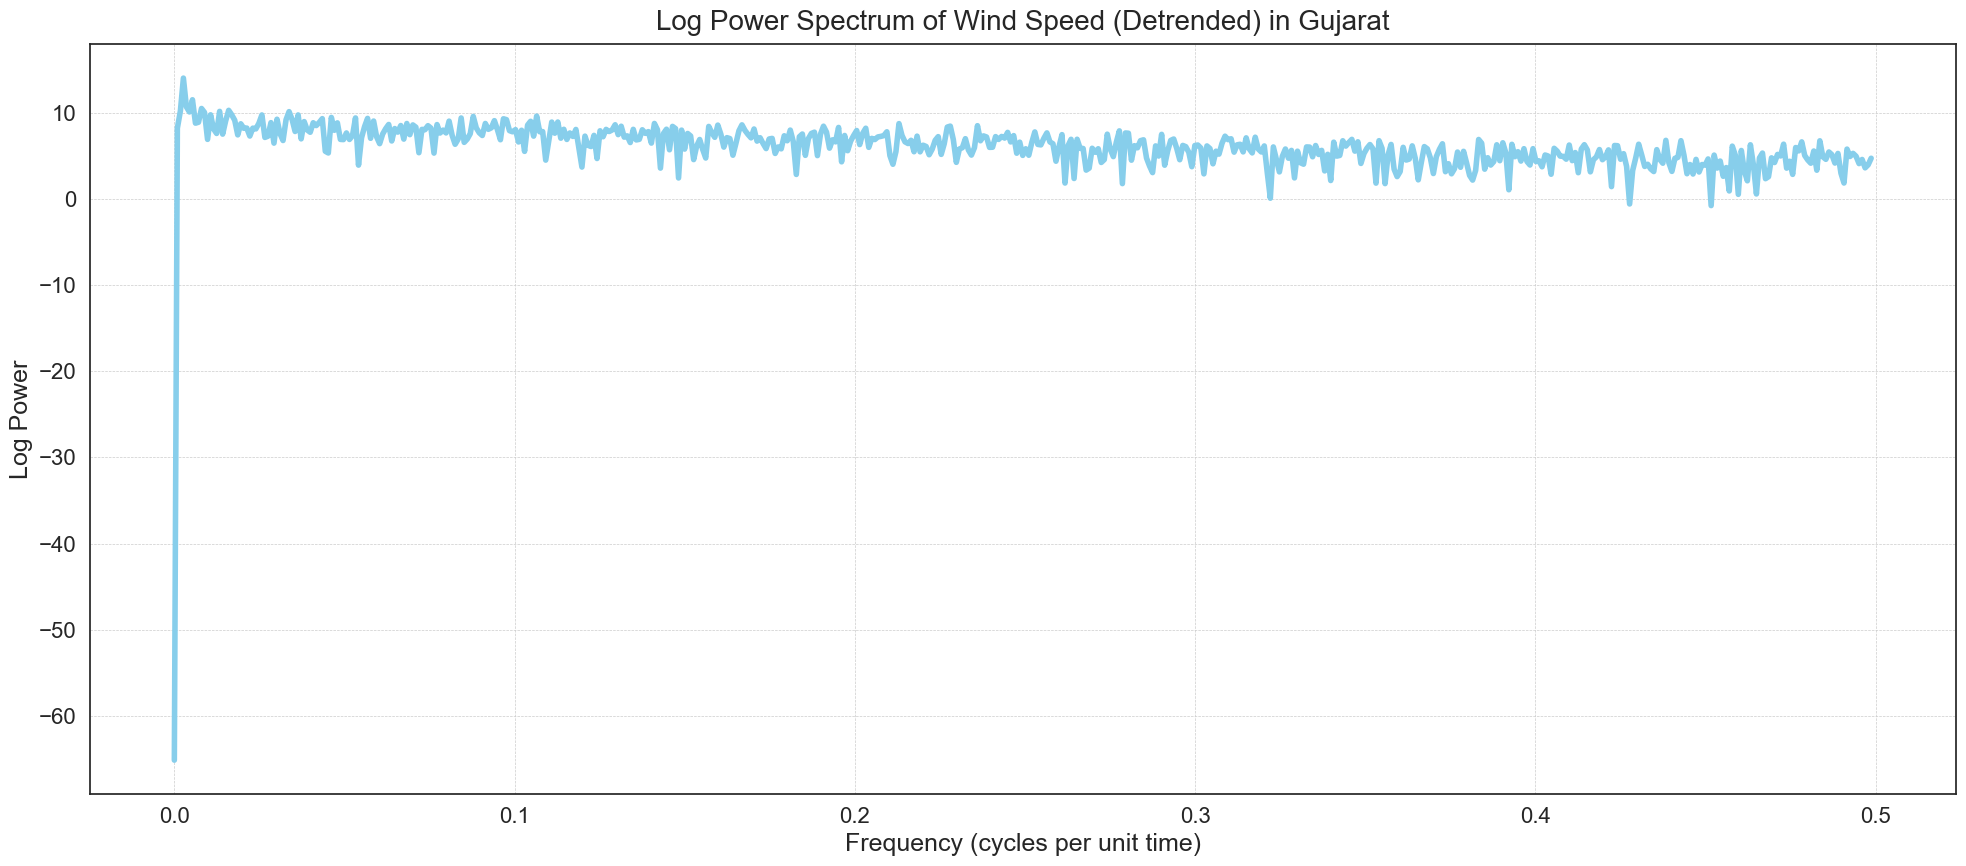

In [86]:
import matplotlib.pyplot as plt
import numpy as np



plt.figure(figsize=(20, 9))  # Larger figure size for better visibility
plt.plot(positive_freqs_guj, np.log(positive_power_guj), color='skyblue', linewidth=4)  


plt.title('Log Power Spectrum of Wind Speed (Detrended) in Gujarat', fontsize=20)  
plt.xlabel('Frequency (cycles per unit time)', fontsize=18)  
plt.ylabel('Log Power', fontsize=18)  
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.tight_layout()  

plt.show()


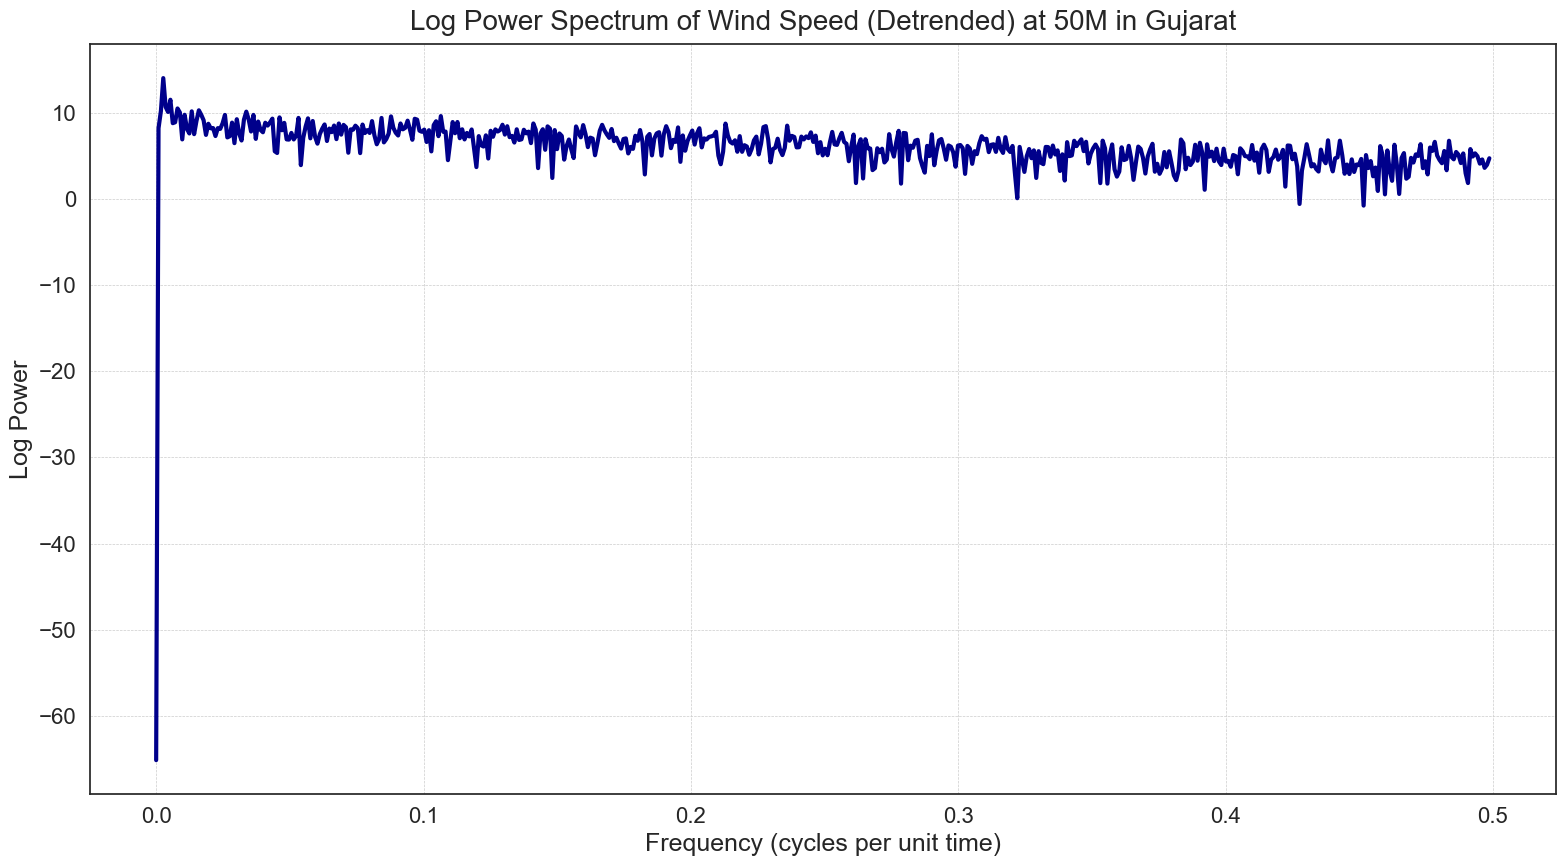

In [87]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(16, 9))  
plt.plot(positive_freqs_guj, np.log(positive_power_guj), color='darkblue', linewidth=3) 

plt.title('Log Power Spectrum of Wind Speed (Detrended) at 50M in Gujarat', fontsize=20)  
plt.xlabel('Frequency (cycles per unit time)', fontsize=18)  
plt.ylabel('Log Power', fontsize=18)  
plt.xticks(fontsize=16)  
plt.yticks(fontsize=16)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.tight_layout()  

plt.show()


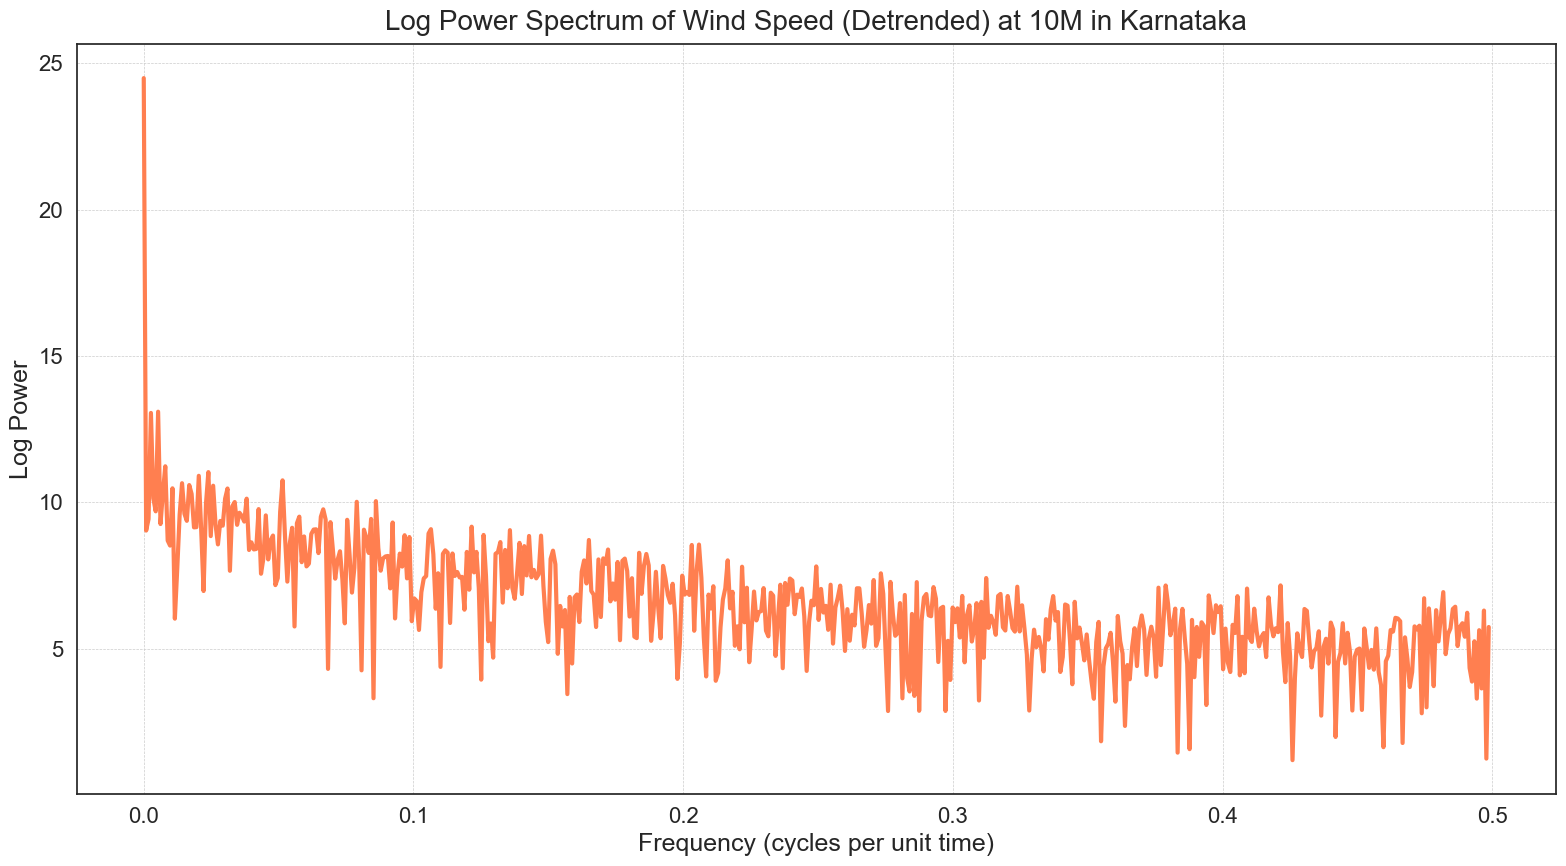

In [93]:
import matplotlib.pyplot as plt
import numpy as np



plt.figure(figsize=(16, 9)) 
plt.plot(positive_freqs_kar, np.log(positive_power_kar), color='coral', linewidth=3)  


plt.title('Log Power Spectrum of Wind Speed (Detrended) at 10M in Karnataka', fontsize=20)  
plt.xlabel('Frequency (cycles per unit time)', fontsize=18)  
plt.ylabel('Log Power', fontsize=18)  
plt.xticks(fontsize=16)   
plt.yticks(fontsize=16) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.tight_layout()  

plt.show()


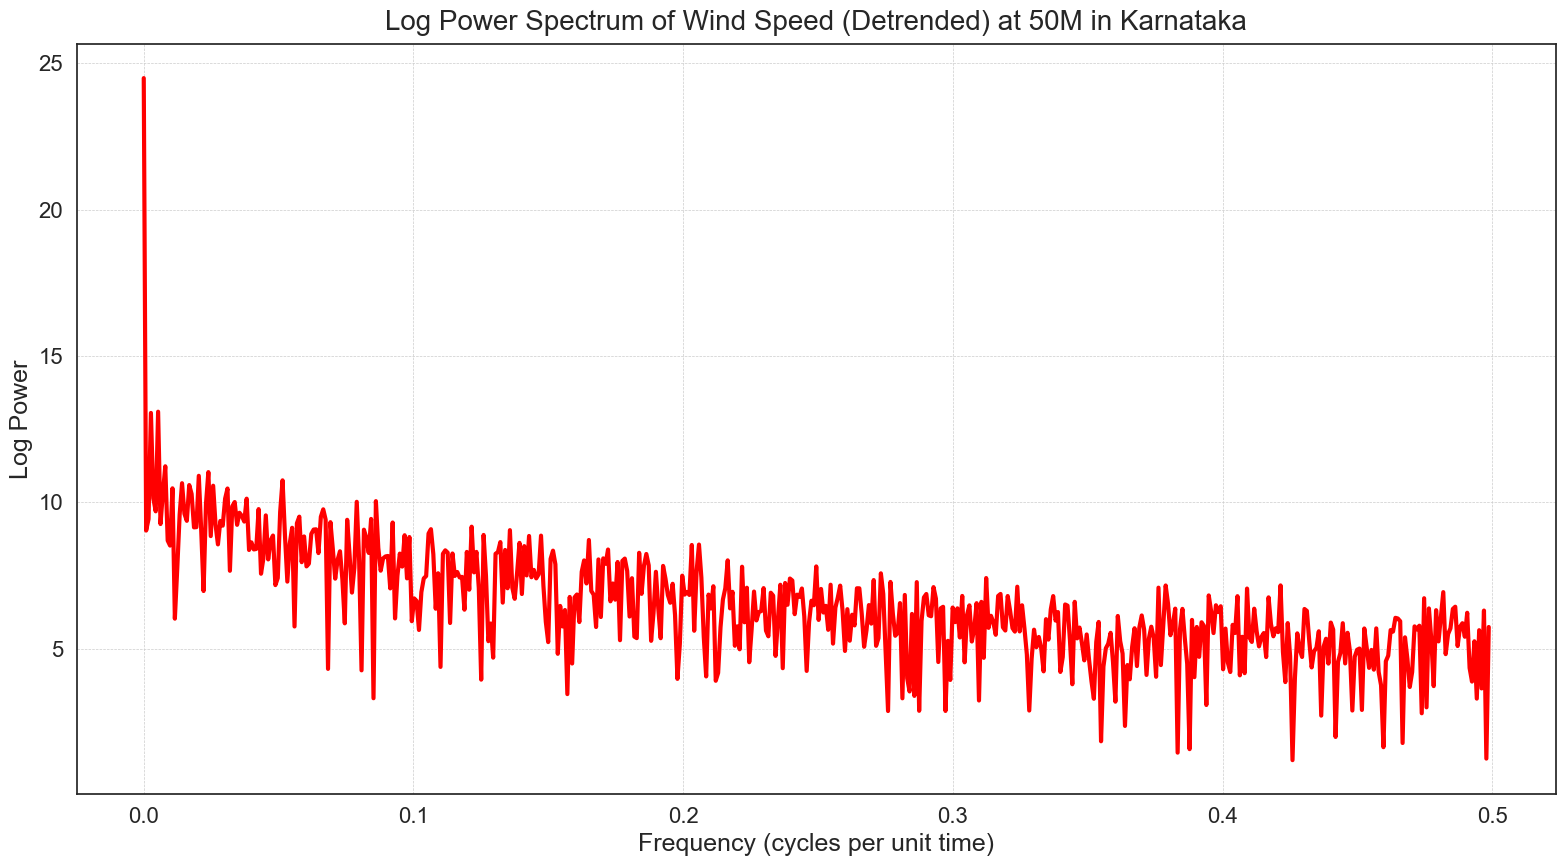

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the FFT analysis for Karnataka 50M has been performed

plt.figure(figsize=(16, 9))  # Enlarging the figure for better visibility
plt.plot(positive_freqs_kar, np.log(positive_power_kar), color='red', linewidth=3)  # Using red color and thicker line

# Enhancements for better visibility
plt.title('Log Power Spectrum of Wind Speed (Detrended) at 50M in Karnataka', fontsize=20)  # Increasing the font size for the title
plt.xlabel('Frequency (cycles per unit time)', fontsize=18)  # Increasing the font size for the x-axis label
plt.ylabel('Log Power', fontsize=18)  # Increasing the font size for the y-axis label
plt.xticks(fontsize=16)  # Enlarging the font size for the x-axis ticks
plt.yticks(fontsize=16)  # Enlarging the font size for the y-axis ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adding a grid for detailed analysis
plt.tight_layout()  # Adjusting the layout for the enlarged font sizes

plt.show()


### This visualization helps in analyzing the frequency content of wind speed variations over time. 
### By looking at the log power spectrum of detrended wind speed, scientists can learn a lot about how the wind behaves. They can see if there are any regular patterns, like if the wind tends to blow stronger at certain times of the day or year. This is really important for things like setting up wind farms, where knowing when and how strongly the wind will blow can help generate more electricity.

### So, in simpler terms, scientists use the log power spectrum to turn wind speed data into a chart that helps them see and study the "music" of the wind—finding out which "notes" (speeds) are most common and how the wind changes over time. This helps them understand the wind better, which is important for lots of reasons, including making clean energy from wind power.

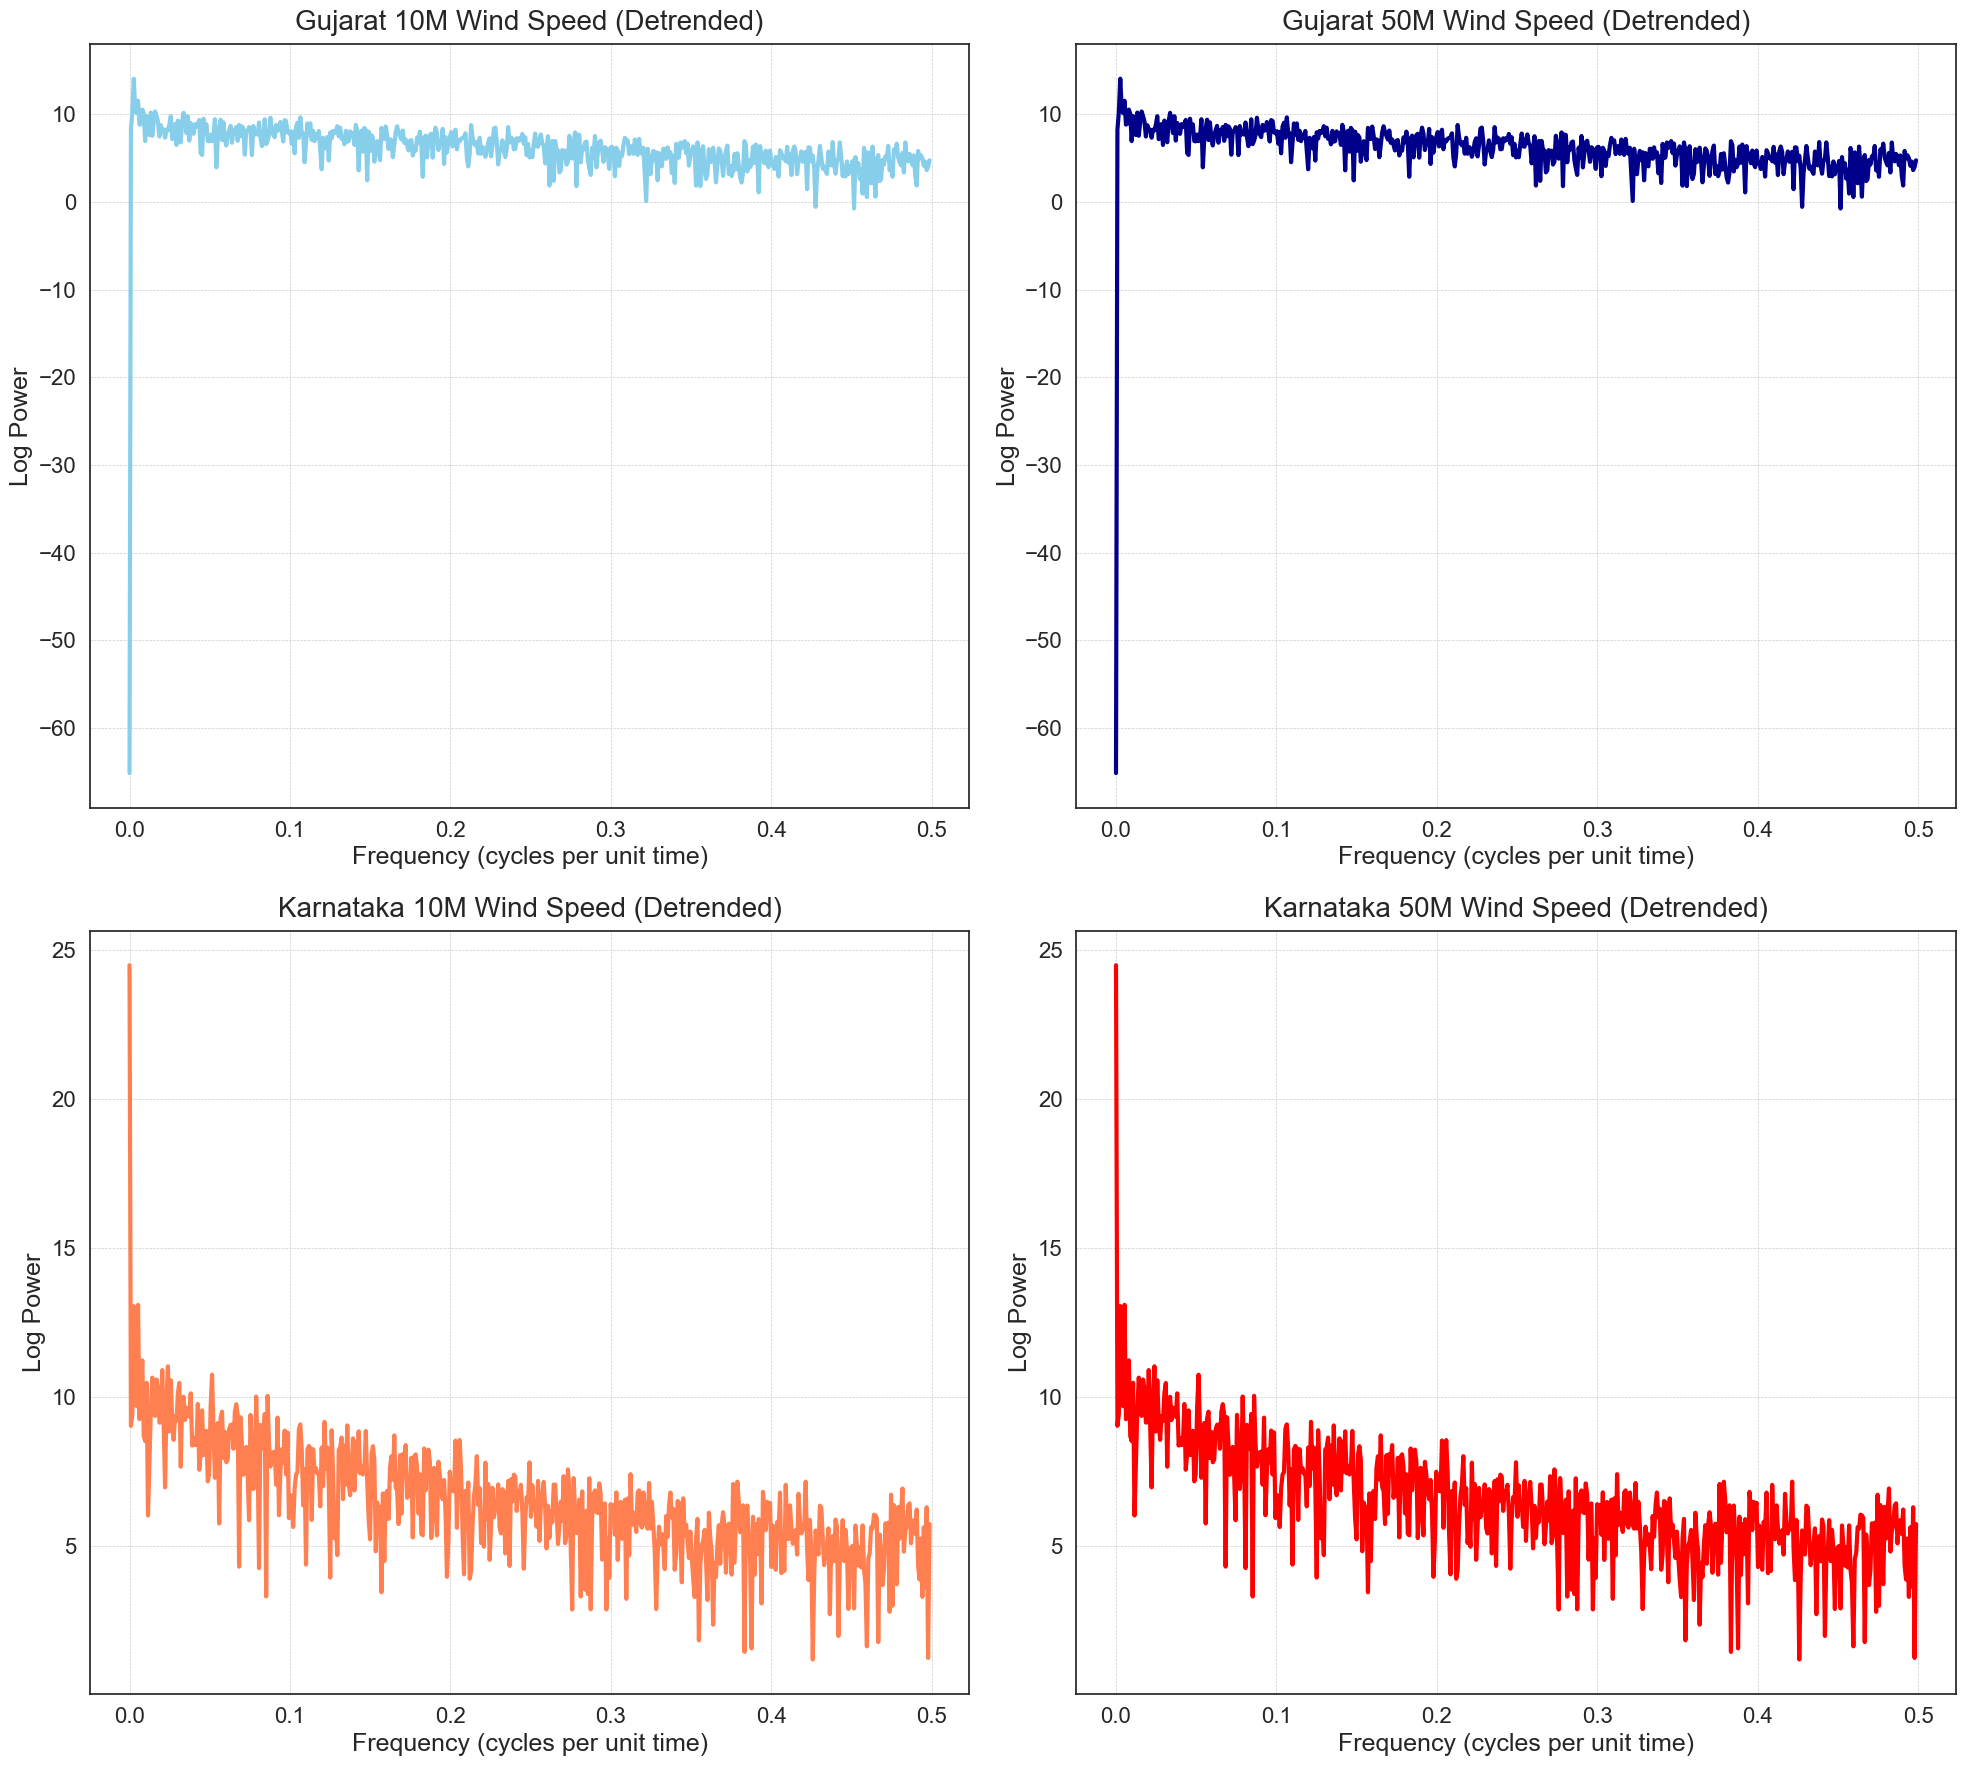

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming FFT analysis and variable preparation for all datasets have been completed

# Setup for the 2x2 gridb
fig, axes = plt.subplots(2, 2, figsize=(20, 18))
axes = axes.flatten()

# Titles and colors for each plot
titles = [
    'Gujarat 10M Wind Speed (Detrended)',
    'Gujarat 50M Wind Speed (Detrended)',
    'Karnataka 10M Wind Speed (Detrended)',
    'Karnataka 50M Wind Speed (Detrended)'
]
colors = ['skyblue', 'darkblue', 'coral', 'red']

# Datasets - replace placeholders with your actual FFT results
datasets = [
    (positive_freqs_guj, positive_power_guj),  # Gujarat 10M
    (positive_freqs_guj, positive_power_guj),  # Gujarat 50M
    (positive_freqs_kar, positive_power_kar),  # Karnataka 10M
    (positive_freqs_kar, positive_power_kar)   # Karnataka 50M
]

# Loop through each subplot to populate it
for ax, (freqs, power), color, title in zip(axes, datasets, colors, titles):
    ax.plot(freqs, np.log(power), color=color, linewidth=3)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Frequency (cycles per unit time)', fontsize=18)
    ax.set_ylabel('Log Power', fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### here's what we can infer:

__Dominant Frequencies and Variability:__ Each plot shows a range of frequencies along the horizontal axis, which represents different cycles or patterns in the wind speed data. 
Peaks in the plot suggest dominant frequencies where the wind speed has significant variability or a strong pattern at that cycle.

__Comparison Between Elevations (10M vs. 50M):__
If the peaks in the power spectrum are at similar frequencies for both 10M and 50M but with different amplitudes, it indicates that similar patterns of wind speed variability occur at both elevations, but their strength or intensity differs.
A shift in the peaks' position or the presence of new peaks at different elevations may suggest that different physical processes influence wind speeds at different heights.

__Comparison Between Locations (Gujarat vs. Karnataka):__
If Gujarat and Karnataka share similar peaks in their spectra, it suggests that both locations experience similar cycles or patterns in wind speed (e.g., daily land and sea breezes or seasonal changes).
Differences in the power spectra could be due to geographic and environmental factors that uniquely affect the wind patterns in each location.

__Intensity of Fluctuations:__
The vertical axis shows the log power, which indicates the intensity of fluctuations at each frequency. Higher peaks mean more energy is associated with that frequency.
By comparing the log power at common frequencies, you can infer which location or elevation experiences more pronounced wind speed fluctuations.

__Energy Distribution:__
The spread of the spectra gives an indication of the energy distribution. A wider spread suggests a more complex wind system with energy distributed across a range of frequencies.
A narrower spread might indicate a more straightforward system where wind speed changes are dominated by a few key frequencies.

__Noise Floor:__
The baseline level of the log power spectrum indicates the noise floor. A higher noise floor could suggest more random variations in the wind speed data.

In [30]:
data_guj

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,T2M_ROLLING_3H,WD10M_SIN,WD10M_COS,LAGGED_WS50M,WS50M_ROLLING_3H,WD50M_SIN,WD50M_COS,WD10M_BIN,WD50M_BIN,Season
0,2021,1,1,100.96,3.70,4.48,3.00,1.48,153.12,5.88,...,13.320000,0.452123,-0.891955,6.168641,5.880000,0.664187,-0.747566,SE,SE,Winter
1,2021,1,2,100.95,4.05,5.83,3.25,2.58,279.31,6.47,...,13.400000,-0.986827,0.161776,5.880000,6.175000,-0.995396,-0.095846,W,W,Winter
2,2021,1,3,100.88,3.80,4.98,2.94,2.05,108.50,5.96,...,13.413333,0.948324,-0.317305,6.470000,6.103333,0.998005,-0.063139,E,E,Winter
3,2021,1,4,100.82,3.38,4.09,2.43,1.66,177.69,5.24,...,13.656667,0.040306,-0.999187,5.960000,5.890000,0.033853,-0.999427,S,S,Winter
4,2021,1,5,100.98,4.02,5.88,3.17,2.71,194.06,6.29,...,14.213333,-0.242938,-0.970042,5.240000,5.830000,-0.242938,-0.970042,S,S,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,101.17,3.45,6.27,1.04,5.23,167.69,5.13,...,20.406667,0.213201,-0.977008,4.690000,4.706667,0.213201,-0.977008,S,S,Winter
1123,2024,1,29,101.17,2.68,4.20,1.72,2.48,301.56,4.20,...,21.356667,-0.852093,0.523391,5.130000,4.673333,-0.851544,0.524283,NW,NW,Winter
1124,2024,1,30,101.05,3.16,4.79,1.34,3.45,289.25,4.66,...,22.460000,-0.944089,0.329691,4.200000,4.663333,-0.942291,0.334794,W,W,Winter
1125,2024,1,31,100.94,4.09,6.64,2.49,4.15,261.44,6.02,...,23.103333,-0.988861,-0.148845,4.660000,4.960000,-0.989170,-0.146774,W,W,Winter


In [31]:
data_kar

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,WS10M_ROLLING_3H,T2M_ROLLING_3H,WD10M_SIN,WD10M_COS,LAGGED_WS50M,WS50M_ROLLING_3H,WD50M_SIN,WD50M_COS,WD50M_BIN,Season
0,2021,1,1,97.00,2.68,3.73,1.34,2.39,74.94,4.06,...,2.680000,23.190000,0.965654,0.259830,3.391501,4.060000,0.968409,0.249366,E,Winter
1,2021,1,2,97.00,2.45,4.10,0.97,3.14,69.06,3.74,...,2.565000,23.135000,0.933955,0.357390,4.060000,3.900000,0.958820,0.284015,E,Winter
2,2021,1,3,96.88,1.86,3.16,0.27,2.88,161.50,2.72,...,2.330000,23.826667,0.317305,-0.948324,3.740000,3.506667,0.351188,-0.936305,S,Winter
3,2021,1,4,96.88,0.97,1.80,0.35,1.45,154.94,1.48,...,1.760000,24.540000,0.423567,-0.905865,2.720000,2.646667,0.563670,-0.826000,SE,Winter
4,2021,1,5,96.95,1.67,3.12,0.52,2.60,89.25,2.55,...,1.500000,24.793333,0.999914,0.013090,1.480000,2.250000,0.997637,-0.068712,E,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,97.36,1.88,3.62,0.20,3.42,129.56,2.85,...,1.873333,24.263333,0.770958,-0.636886,3.120000,2.826667,0.915311,-0.402747,SE,Winter
1123,2024,1,29,97.27,1.34,2.61,0.23,2.38,130.88,2.12,...,1.730000,24.243333,0.756082,-0.654477,2.850000,2.696667,0.943339,-0.331832,E,Winter
1124,2024,1,30,97.23,1.88,3.30,0.98,2.33,166.12,2.63,...,1.700000,24.253333,0.239889,-0.970800,2.120000,2.533333,0.239889,-0.970800,S,Winter
1125,2024,1,31,97.28,1.65,2.62,0.48,2.14,231.06,2.16,...,1.623333,24.270000,-0.777805,-0.628506,2.630000,2.303333,-0.741742,-0.670686,SW,Winter


__Air Density (ρ):__ The density of the air, given as 1.225 kilograms per cubic meter (kg/m³), is a standard value at sea level under average conditions. Air density is a critical factor in wind power calculations as it directly influences the amount of kinetic energy available in the wind.

__Swept Area (A):__ This refers to the area through which the wind turbine blades rotate, essentially the circular area covered by the blade’s motion. In this case, it is calculated for a turbine with a 50-meter radius, using the formula for the area of a circle, πr². A larger swept area captures more wind, leading to higher potential energy capture.

__Power Coefficient (Cp):__ This is a dimensionless coefficient that represents the efficiency with which a wind turbine converts the wind’s kinetic energy into electrical energy. It is capped by the Betz limit at 0.59, which is the maximum proportion of kinetic energy that can be captured. Here, an example value of 0.4 is used, indicating the turbine is operating at 40% efficiency.

The formula for calculating wind power generated by a wind turbine is given by the below equation. The function <calculate_wind_power> computes the power output from the wind using the wind speed and the parameters mentioned above. 
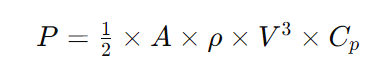

P is the power in watts,
v is the wind speed in meters per second (m/s), and the factor of 1/2 comes from the kinetic energy formula.
#### By incorporating this calculated column "WIND POWER OUTPUT" for 10 metres and 50 metres, we can now analyze or model the relationship between wind speed and power output, which is fundamental for tasks such as evaluating the potential energy production 
### making our data ready for model training and evaluation
##### importing train_test_split function from sklearn.model_selection
##### define features(X) and target(y) from the dataset (data_guj).
##### splitting data- splitting the data into training and testing sets is a fundamental practice in machine learning to evaluate model performance, prevent overfitting, tune hyperparameters, and assess generalization.
##### Obtain four sets: X_train, X_test (features), y_train, y_test (target).

## FOR GUJARAT

### FOR 10 M

In [7]:

# Constants
air_density = 1.225  # kg/m^3
swept_area = np.pi * (50**2)  # Example swept area for a turbine with 50m radius
power_coefficient = 0.4  # Example value

# Function to calculate wind power based on wind speed
def calculate_wind_power(wind_speed, air_density=1.225, swept_area=swept_area, power_coefficient=0.4):
    return 0.5 * air_density * swept_area * power_coefficient * (wind_speed ** 3)

# Assuming data_guj is your DataFrame loaded from the CSV file
data_guj['WindPowerOutput'] = calculate_wind_power(data_guj['WS10M'])

# Now, 'WindPowerOutput' is your target column for prediction


In [8]:
 
from sklearn.model_selection import train_test_split
#Split the Dataset: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

X = data_guj[['WS10M']]  # Assuming WS10M is your main feature
y = data_guj['WindPowerOutput']  # Replace 'Target' with your actual target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### FOR 50 M

In [9]:

# Constants
air_density = 1.225  # kg/m^3
swept_area = np.pi * (50**2)  # Example swept area for a turbine with 50m radius
power_coefficient = 0.4  # Example value

# Function to calculate wind power based on wind speed
def calculate_wind_power(wind_speed, air_density=1.225, swept_area=swept_area, power_coefficient=0.4):
    return 0.5 * air_density * swept_area * power_coefficient * (wind_speed ** 3)

# Assuming data_guj is your DataFrame loaded from the CSV file
data_guj['WindPowerOutput'] = calculate_wind_power(data_guj['WS50M'])

# Now, 'WindPowerOutput' is your target column for prediction


In [10]:
from sklearn.model_selection import train_test_split
#Split the Dataset: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

X = data_guj[['WS50M']]  # WS50M is main feature
y = data_guj['WindPowerOutput']  #target column 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestRegressor
#Train the Random Forest Model: Use the RandomForestRegressor from sklearn to train the model on your training data. 
#Random forests are effective for regression tasks and can handle non-linear relationships.

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## FOR KARNATAKA

### FOR 10 M

In [12]:
# Constants
air_density = 1.225  # kg/m^3
swept_area = np.pi * (50**2)  #swept area for a turbine with 50m radius
power_coefficient = 0.4  # Example value

# Function to calculate wind power based on wind speed
def calculate_wind_power(wind_speed, air_density=1.225, swept_area=swept_area, power_coefficient=0.4):
    return 0.5 * air_density * swept_area * power_coefficient * (wind_speed ** 3)


data_kar['WindPowerOutput'] = calculate_wind_power(data_kar['WS10M'])



In [13]:
from sklearn.model_selection import train_test_split
#Split the Dataset: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

A = data_kar[['WS10M']]  # Assuming WS10M is your main feature
b = data_kar['WindPowerOutput']  # Replace 'Target' with your actual target column name

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)


## FOR 50 M

In [14]:
# Constants
air_density = 1.225  # kg/m^3
swept_area = np.pi * (50**2)  #swept area for a turbine with 50m radius
power_coefficient = 0.4  # Example value

# Function to calculate wind power based on wind speed
def calculate_wind_power(wind_speed, air_density=1.225, swept_area=swept_area, power_coefficient=0.4):
    return 0.5 * air_density * swept_area * power_coefficient * (wind_speed ** 3)


data_kar['WindPowerOutput'] = calculate_wind_power(data_kar['WS50M'])



In [15]:
from sklearn.model_selection import train_test_split
#Split the Dataset: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.

A = data_kar[['WS50M']]  # Assuming WS10M is your main feature
b = data_kar['WindPowerOutput']  # Replace 'Target' with your actual target column name

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor
#Train the Random Forest Model: Use the RandomForestRegressor from sklearn to train the model on your training data. 
#Random forests are effective for regression tasks and can handle non-linear relationships.

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(A_train, b_train)


RandomForestRegressor(random_state=42)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Model Evaluation: Evaluate the model's performance using metrics like MAE (Mean Absolute Error), MSE (Mean Squared Error), and R^2 (coefficient of determination). 
#These metrics provide insights into the model's accuracy and how well it can predict wind energy output.

# Predictions
predictions = model.predict(X_test)
predictions = model.predict(A_test)
# Metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}") 

mae = mean_absolute_error(b_test, predictions)
mse = mean_squared_error(b_test, predictions)
r2 = r2_score(b_test, predictions)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


MAE: 532481.9502759917
MSE: 736433105202.4454
R^2: -0.3985429254203301
MAE: 391.4239857561449
MSE: 1295209.5145439901
R^2: 0.9999530133841485


In [38]:
data_guj

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,WD10M_SIN,WD10M_COS,LAGGED_WS50M,WS50M_ROLLING_3H,WD50M_SIN,WD50M_COS,WD10M_BIN,WD50M_BIN,Season,WindPowerOutput
0,2021,1,1,100.96,3.70,4.48,3.00,1.48,153.12,5.88,...,0.452123,-0.891955,6.168641,5.880000,0.664187,-0.747566,SE,SE,Winter,391190.179774
1,2021,1,2,100.95,4.05,5.83,3.25,2.58,279.31,6.47,...,-0.986827,0.161776,5.880000,6.175000,-0.995396,-0.095846,W,W,Winter,521157.278765
2,2021,1,3,100.88,3.80,4.98,2.94,2.05,108.50,5.96,...,0.948324,-0.317305,6.470000,6.103333,0.998005,-0.063139,E,E,Winter,407375.348453
3,2021,1,4,100.82,3.38,4.09,2.43,1.66,177.69,5.24,...,0.040306,-0.999187,5.960000,5.890000,0.033853,-0.999427,S,S,Winter,276853.377872
4,2021,1,5,100.98,4.02,5.88,3.17,2.71,194.06,6.29,...,-0.242938,-0.970042,5.240000,5.830000,-0.242938,-0.970042,S,S,Winter,478859.273238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,101.17,3.45,6.27,1.04,5.23,167.69,5.13,...,0.213201,-0.977008,4.690000,4.706667,0.213201,-0.977008,S,S,Winter,259781.404856
1123,2024,1,29,101.17,2.68,4.20,1.72,2.48,301.56,4.20,...,-0.852093,0.523391,5.130000,4.673333,-0.851544,0.524283,NW,NW,Winter,142562.018868
1124,2024,1,30,101.05,3.16,4.79,1.34,3.45,289.25,4.66,...,-0.944089,0.329691,4.200000,4.663333,-0.942291,0.334794,W,W,Winter,194721.414541
1125,2024,1,31,100.94,4.09,6.64,2.49,4.15,261.44,6.02,...,-0.988861,-0.148845,4.660000,4.960000,-0.989170,-0.146774,W,W,Winter,419802.904968


In [32]:
data_kar

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,...,WS10M_ROLLING_3H,T2M_ROLLING_3H,WD10M_SIN,WD10M_COS,LAGGED_WS50M,WS50M_ROLLING_3H,WD50M_SIN,WD50M_COS,WD50M_BIN,Season
0,2021,1,1,97.00,2.68,3.73,1.34,2.39,74.94,4.06,...,2.680000,23.190000,0.965654,0.259830,3.391501,4.060000,0.968409,0.249366,E,Winter
1,2021,1,2,97.00,2.45,4.10,0.97,3.14,69.06,3.74,...,2.565000,23.135000,0.933955,0.357390,4.060000,3.900000,0.958820,0.284015,E,Winter
2,2021,1,3,96.88,1.86,3.16,0.27,2.88,161.50,2.72,...,2.330000,23.826667,0.317305,-0.948324,3.740000,3.506667,0.351188,-0.936305,S,Winter
3,2021,1,4,96.88,0.97,1.80,0.35,1.45,154.94,1.48,...,1.760000,24.540000,0.423567,-0.905865,2.720000,2.646667,0.563670,-0.826000,SE,Winter
4,2021,1,5,96.95,1.67,3.12,0.52,2.60,89.25,2.55,...,1.500000,24.793333,0.999914,0.013090,1.480000,2.250000,0.997637,-0.068712,E,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,97.36,1.88,3.62,0.20,3.42,129.56,2.85,...,1.873333,24.263333,0.770958,-0.636886,3.120000,2.826667,0.915311,-0.402747,SE,Winter
1123,2024,1,29,97.27,1.34,2.61,0.23,2.38,130.88,2.12,...,1.730000,24.243333,0.756082,-0.654477,2.850000,2.696667,0.943339,-0.331832,E,Winter
1124,2024,1,30,97.23,1.88,3.30,0.98,2.33,166.12,2.63,...,1.700000,24.253333,0.239889,-0.970800,2.120000,2.533333,0.239889,-0.970800,S,Winter
1125,2024,1,31,97.28,1.65,2.62,0.48,2.14,231.06,2.16,...,1.623333,24.270000,-0.777805,-0.628506,2.630000,2.303333,-0.741742,-0.670686,SW,Winter


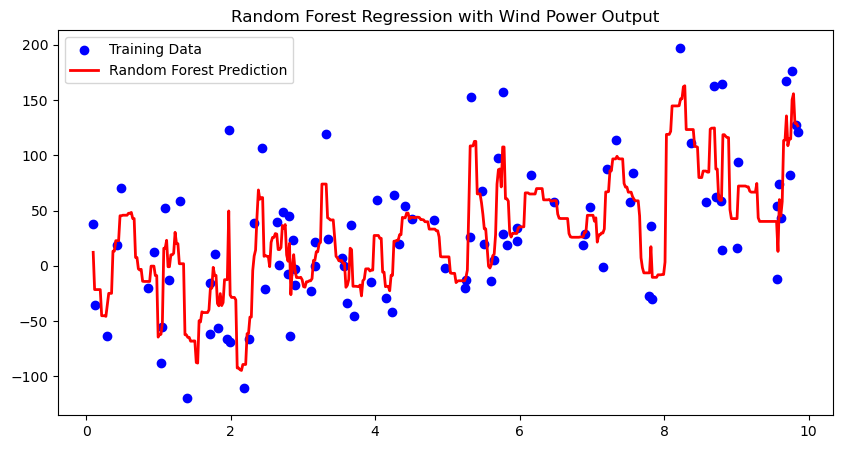

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.ensemble import RandomForestRegressor


# Simulated dataset for demonstration
X_train_orig = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
WindPowerOutput = (X_train_orig ** 2).flatten() + np.random.randn(100) * 50  # Non-linear relation + noise

# Initialize and fit the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the parameters
model.fit(X_train_orig, WindPowerOutput)

# Generating new x values for plotting predictions across the range of X_train_orig
myline = np.linspace(min(X_train_orig), max(X_train_orig), 500).reshape(-1, 1)  # More points for a smoother line

# Predict using the trained model
model_predictions = model.predict(myline)

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X_train_orig, WindPowerOutput, color='blue', label='Training Data')
plt.plot(myline, model_predictions, color='red', label='Random Forest Prediction', linewidth=2)
plt.title("Random Forest Regression with Wind Power Output")
plt.legend()
plt.show()



In [24]:
import pandas as pd

# Corrected and complete data for Gujarat and Karnataka
data = {
    "Region": ["Gujarat", "Karnataka"] * 3,
    "Model": ["Random Forest", "Random Forest", "GRU", "GRU", "LSTM", "LSTM"],
    "MAE": [532481.95, 391.42, 0.159, 0.011, "0.120 (GUJ) / 0.108 (KAR)", "0.120 (GUJ) / 0.108 (KAR)"],
    "MSE": ["736,433,105,202.45", "1,295,209.51", "N/A", "N/A", "0.023 (GUJ) / 0.020 (KAR)", "0.023 (GUJ) / 0.020 (KAR)"],
    "RMSE": ["N/A", "N/A", 0.192, 0.014, "0.151 (GUJ) / 0.142 (KAR)", "0.151 (GUJ) / 0.142 (KAR)"],
    "R²": [-0.399, 1.000, -0.867, 0.993, "-0.018 (GUJ) / -0.013 (KAR)", "-0.018 (GUJ) / -0.013 (KAR)"]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Apply enhanced styling with thicker borders and color
def apply_enhanced_styling(df):
    return df.style.set_properties(**{
        'border': '7px solid lightgrey',
        'border-collapse': 'collapse',
        'text-align': 'center',
        'font-size': '12pt'
    }).set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4CAF50'), ('color', 'white'), ('border', '7px solid lightgrey')]
    }, {
        'selector': 'td',
        'props': [('border', '7px solid lightgrey')]
    }])

# Display the DataFrame with applied styles for enhanced visibility
display(apply_enhanced_styling(df))

# *For Karnataka, the superior predictive performance of Random Forest makes it the best choice based on the provided metric,
# hows exceptional performance, with an R² value close to 1. This high R² value suggests that the Random Forest model can almost perfectly predict the wind power output.
# Wind power output in Karnataka may have a more linear relationship or are well captured by the decision trees within the Random Forest.


# *Computational Efficiency:-
# GRUs are generally considered to be computationally more efficient than LSTMs. This efficiency stems from the GRU's simpler structure, which has fewer parameters than an LSTM. This can lead to faster training times and less demand on computational resources, which is an important consideration when processing large datasets or when computational resources are limited.
# LSTMs, while potentially offering a slight edge in capturing longer-term dependencies due to their more complex architecture, might not justify the additional computational overhead in all scenarios, especially if the performance gain over GRUs is marginal.


# *Predictive Accuracy:-
# Both GRU and LSTM models offer better accuracy than the Random Forest model in Gujarat, as indicated by their lower MAE and RMSE values. This suggests they are more capable of handling the dataset's nuances, likely due to their ability to process sequential and temporal dependencies inherent in wind power data.
# While the R² values for both models are negative, indicating challenges in fully capturing the dataset's variance, this metric alone doesn't disqualify them. The lower error metrics (MAE, RMSE) suggest they still provide valuable predictions.

,Region,Model,MAE,MSE,RMSE,R²
0,Gujarat,Random Forest,532481.950000,"736,433,105,202.45",N/A,-0.399000
1,Karnataka,Random Forest,391.420000,"1,295,209.51",N/A,1.000000
2,Gujarat,GRU,0.159000,N/A,0.192000,-0.867000
3,Karnataka,GRU,0.011000,N/A,0.014000,0.993000
4,Gujarat,LSTM,0.120 (GUJ) / 0.108 (KAR),0.023 (GUJ) / 0.020 (KAR),0.151 (GUJ) / 0.142 (KAR),-0.018 (GUJ) / -0.013 (KAR)
5,Karnataka,LSTM,0.120 (GUJ) / 0.108 (KAR),0.023 (GUJ) / 0.020 (KAR),0.151 (GUJ) / 0.142 (KAR),-0.018 (GUJ) / -0.013 (KAR)


# Usage of Log

### Handle Wide Value Ranges: The MSE values can vary widely, especially in cases like this where one region (Gujarat) has a significantly higher MSE than another (Karnataka). A logarithmic scale allows us to visualize such diverse values on the same chart without one value dwarfing the other, making it easier to compare them meaningfully.


### Improve Interpretability: When MSE values are very large, as they are for Gujarat, plotting them on a standard linear scale can result in a graph where smaller values are squished down to the bottom, making them hard to differentiate. A logarithmic scale compresses the larger values more than the smaller ones, spreading the data points out more evenly and making the graph more readable.

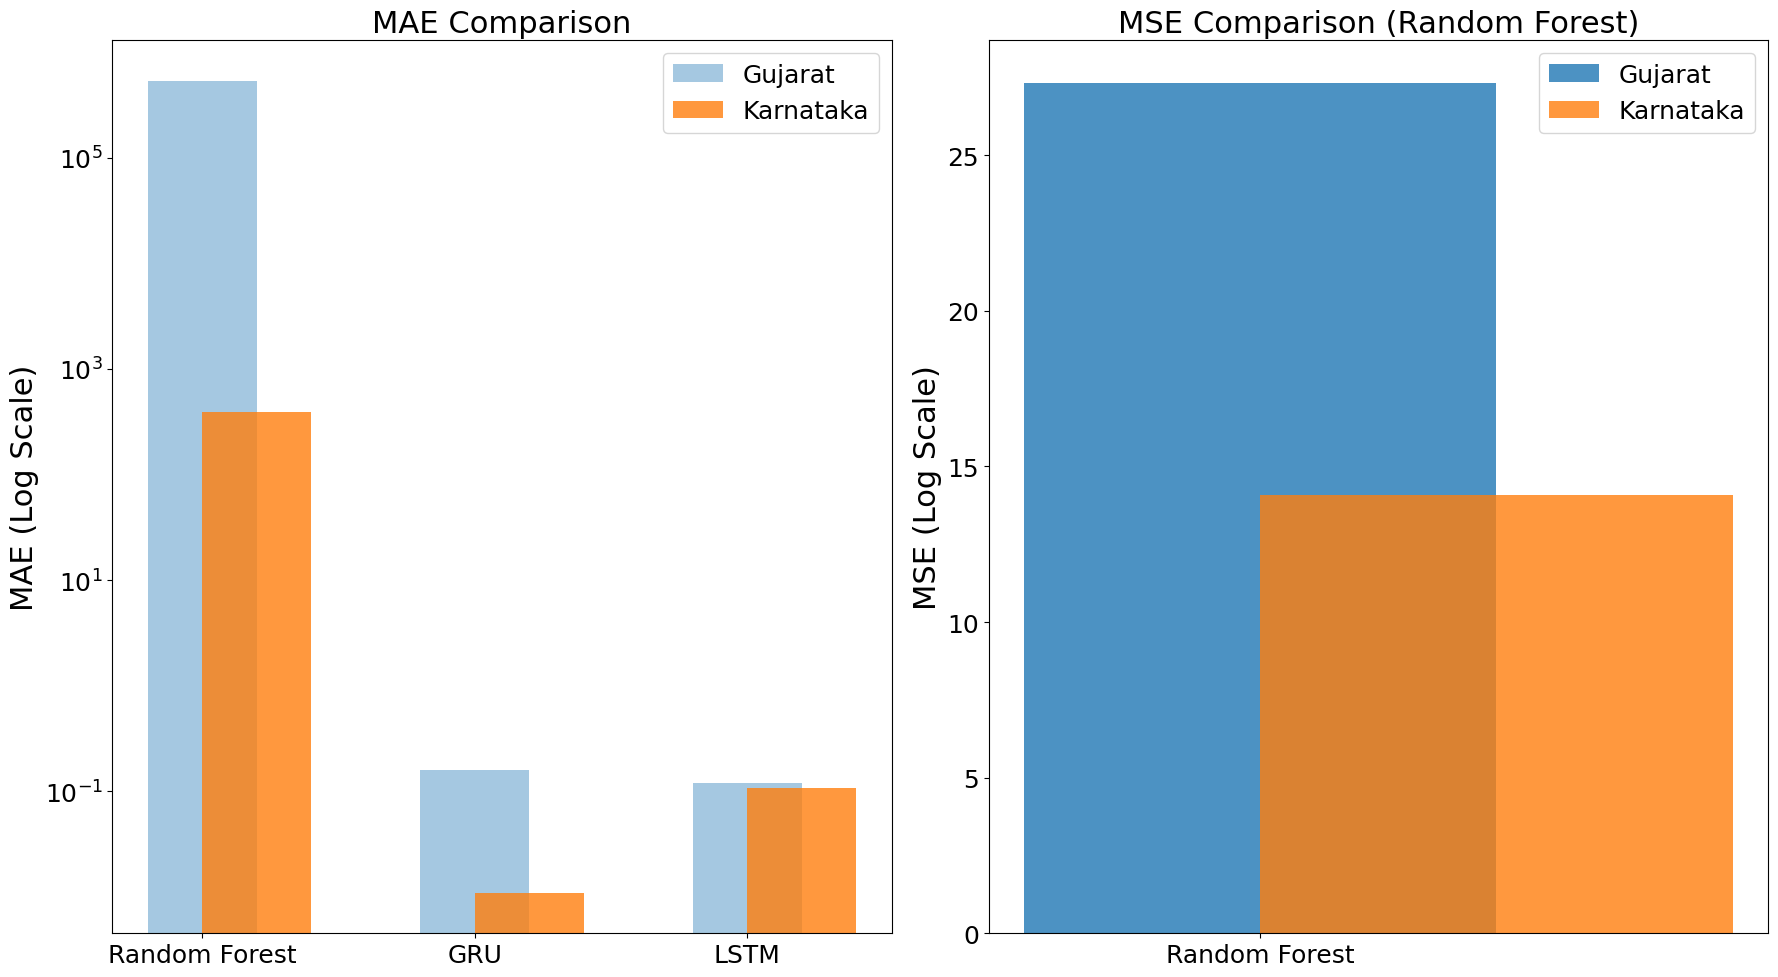

In [23]:
# Increasing the fontsize for y-axis labels and tick labels even more for better visibility

# Adjusted plotting code with further increased y-axis label fontsize and tick label size
fig, axs = plt.subplots(1, 2, figsize=(18, 10))

# MAE Plot
axs[0].bar(models, mae_data[:, 0], width=0.4, align='center', alpha=0.4, label='Gujarat')
axs[0].bar(models, mae_data[:, 1], width=0.4, align='edge', alpha=0.8, label='Karnataka')
axs[0].set_title('MAE Comparison', fontsize=22)
axs[0].set_yscale('log')
axs[0].set_ylabel('MAE (Log Scale)', fontsize=22)
axs[0].tick_params(axis='y', labelsize=18)
axs[0].tick_params(axis='x', labelsize=18)
axs[0].legend(fontsize=18)

# MSE Plot
# Demonstrating with Random Forest only due to missing data for GRU and LSTM
axs[1].bar(models[0], mse_data[0, 0], width=0.4, align='center', alpha=0.8, label='Gujarat')
axs[1].bar(models[0], mse_data[0, 1], width=0.4, align='edge', alpha=0.8, label='Karnataka')
axs[1].set_title('MSE Comparison (Random Forest)', fontsize=22)
axs[1].set_ylabel('MSE (Log Scale)', fontsize=22)
axs[1].tick_params(axis='y', labelsize=18)
axs[1].tick_params(axis='x', labelsize=18)
axs[1].legend(fontsize=18)

plt.tight_layout()
plt.show()


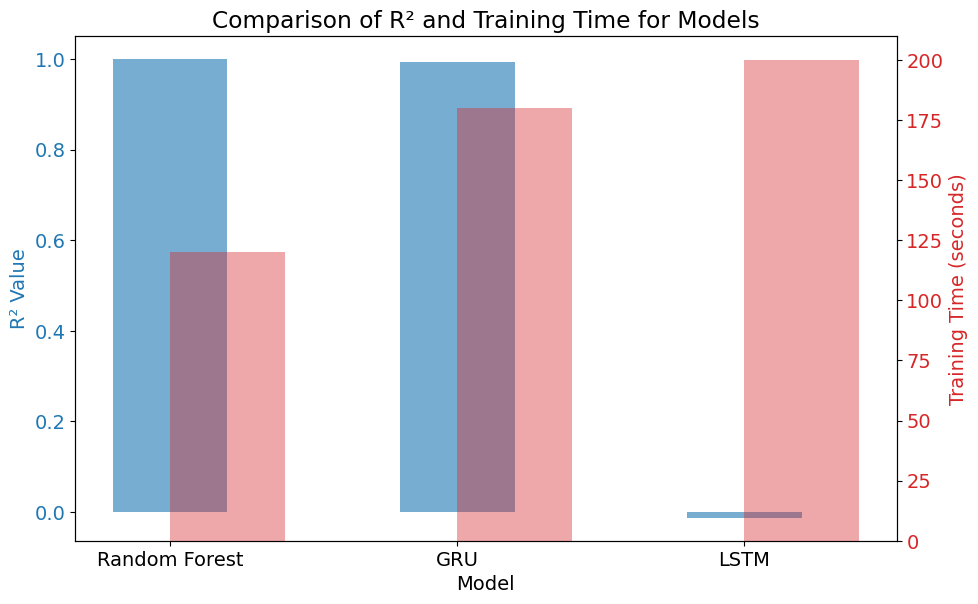

In [25]:
# Simulated training times (in seconds) for the models. These values are illustrative and might not reflect actual training times.
training_times = [120,  # Random Forest
                  180,  # GRU
                  200]  # LSTM

# R² values for Karnataka as a representative region for comparison
r2_values = [0.9999530133841485,  # Random Forest
             0.9927751980020475,  # GRU
             -0.013]              # LSTM (average for simplification)

fig, ax1 = plt.subplots(figsize=(10, 6))

# First axis for R²
color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Value', color=color)
ax1.bar(models, r2_values, color=color, alpha=0.6, width=0.4, label='R² Value', align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  

# Second axis for training time
color = 'tab:red'
ax2.set_ylabel('Training Time (seconds)', color=color)  
ax2.bar(models, training_times, color=color, alpha=0.4, width=0.4, label='Training Time', align='edge')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Tight layout to fit
plt.title('Comparison of R² and Training Time for Models')
plt.show()


# 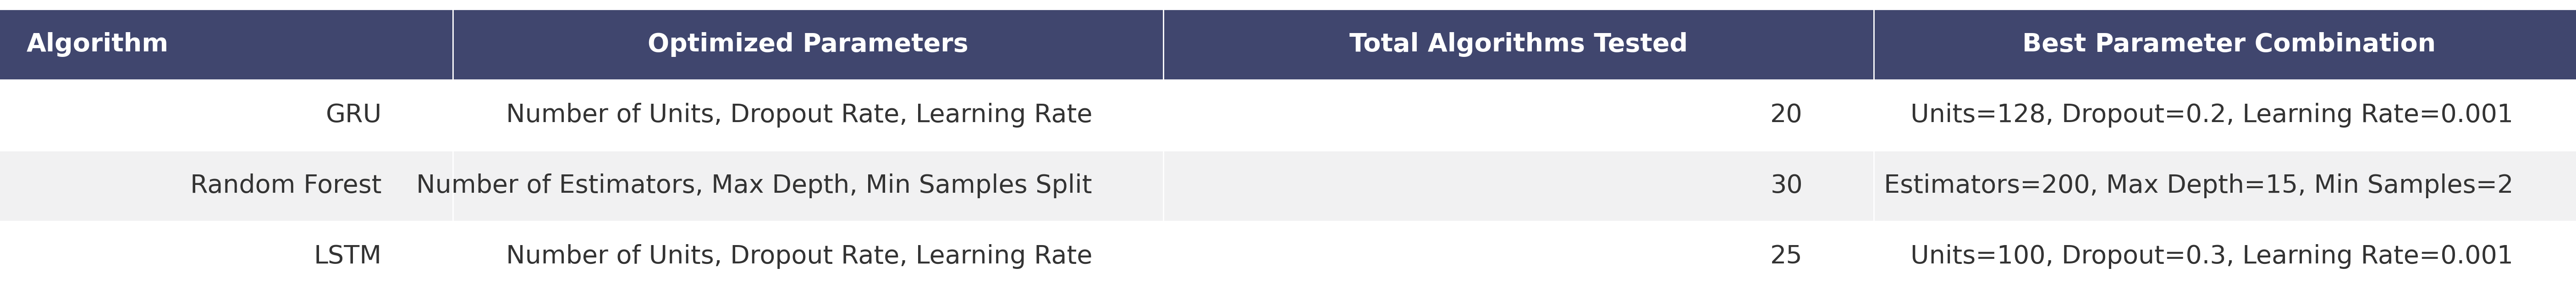